In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from random import sample, seed

In [3]:
Hubble_h = 0.73
BoxSize = ((62.5**3) * (8/8))**(1/3)
#BoxSize = ((500**3) * (512/512))**(1/3)
#BoxSize = ((250**3) * (1/125))**(1/3)
print(BoxSize)
dilute = 5000
sSFRcut = -11.0

62.499999999999986


In [4]:
directory = '../src/auxdata/trees/play/'
filename = 'model'
redshift = [0.000, 1.386, 2.070, 3.060, 4.179, 5.289, 6.197, 7.272] #millennium 
#redshift = [0.024, 1.309, 2.051, 3.033, 4.088, 5.127, 6.044, 7.098] #genesis
#redshift = [0.000, 1.379, 2.028, 3.060, 4.043, 5.161, 6.231, 7.313] #bolshoi
#redshift = [0.000]
firstfile = 0
lastfile = 7
MaxTreeFiles = lastfile - firstfile + 1

In [ ]:
def galdtype():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [ ]:
def galdtype1():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('f_H2'                         , np.float32),
        ('f_HI'                         , np.float32),
        ('cf'                           , np.float32),
        ('Zp'                           , np.float32),
        ('Pressure'                     , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [5]:
def galdtype2():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('f_H2'                         , np.float32),
        ('f_HI'                         , np.float32),
        ('cf'                           , np.float32),
        ('Zp'                           , np.float32),
        ('Pressure'                     , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('ColdDust'                     , np.float32),
        ('HotDust'                      , np.float32),
        ('EjectedDust'                     , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('dustdotform'                  , np.float32),
        ('dustdotgrowth'                    , np.float32),
        ('dustdotdestruct'                    , np.float32),
#        ('Sfr'                          , (np.float32, 64)),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [6]:
def read_one_file(name, Galdesc):
    fin = open(name, 'rb')
    Ntrees = np.fromfile(fin,np.dtype(np.int32),1)[0]
    NtotGals = np.fromfile(fin,np.dtype(np.int32),1)[0]
    GalsPerTree = np.fromfile(fin, np.dtype((np.int32, Ntrees)),1)[0]
    G = np.fromfile(fin, Galdesc, NtotGals)
    G = G.view(recarray)
    return G

In [7]:
Galdesc = galdtype2()
#Galdesc1 = galdtype1()
#Galdesc2 = galdtype2()

G_history = [0]*len(redshift)
for i in range(len(redshift)):
    G_snap = []
    G_snap1 = []
    G_snap2 = []
    GalsTree = []
    
    for k in range(firstfile, lastfile+1):
        name = (directory+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{k}')
        G = read_one_file(name, Galdesc)
        G_snap.extend(G)
        
    G_snap = np.array(G_snap)
    G_snap = G_snap.view(recarray)
    
    G_history[i] = G_snap


In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80
matplotlib.rcParams.update({'errorbar.capsize': 2})
matplotlib.rcParams.update({'font.size': 12})

In [ ]:
w = np.where(np.log10(G_history[3].StellarMass * 1.e10 / Hubble_h) > 10.5 )[0]
print((G_history[3].SfrBulge[w] + G_history[3].SfrDisk[w]) / (G_history[3].StellarMass[w] * 1.e10 /Hubble_h))
print(np.log10(G_history[3].StellarMass[w] * 1.e10 /Hubble_h))
print((G_history[3].MetalsColdGas[w] / G_history[3].ColdGas[w]) / 0.02)
Z= np.log10((G_history[3].MetalsColdGas[w] / G_history[3].ColdGas[w]) / 0.02) + 9.0
mass = np.log10(G_history[3].StellarMass[w] * 1.e10 /Hubble_h)
ssfr = (G_history[3].SfrBulge[w] + G_history[3].SfrDisk[w]) / (G_history[3].StellarMass[w] * 1.e10 /Hubble_h) 
plt.plot(mass, Z, 'x')
plt.axis([8.0, 12.0, 8.0, 9.5])
plt.ylabel(r'$12\ +\ \log_{10}[\mathrm{O/H}]$')
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$') 
print(Z)

In [ ]:
w = np.where((G_history[3].SfrBulge + G_history[3].SfrDisk == 0) )[0]
Z= np.log10((G_history[3].MetalsColdGas[w] / G_history[3].ColdGas[w]) / 0.02) + 9.0
mass = np.log10(G_history[3].StellarMass[w] * 1.e10 /Hubble_h)
ssfr = (G_history[3].SfrBulge[w] + G_history[3].SfrDisk[w]) / (G_history[3].StellarMass[w] * 1.e10 /Hubble_h) 
binwidth = 0.1
mi = 5
ma = 11
NB = int((ma - mi) / binwidth)
(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-')
plt.yscale('log', nonposy='clip')
plt.ylim(1e-5, 7e-3)
1/(BoxSize/Hubble_h)**3 / binwidth



In [ ]:
w = np.where((G_history[0].SfrBulge + G_history[0].SfrDisk == 0) )[0]
Z= np.log10((G_history[2].MetalsColdGas[w] / G_history[2].ColdGas[w]) / 0.02) + 9.0
mass = np.log10(G_history[2].StellarMass[w] * 1.e10 /Hubble_h)
ssfr = (G_history[2].SfrBulge[w] + G_history[2].SfrDisk[w]) / (G_history[2].StellarMass[w] * 1.e10 /Hubble_h) 
Z


# Allresults

## Stellar Mass Function

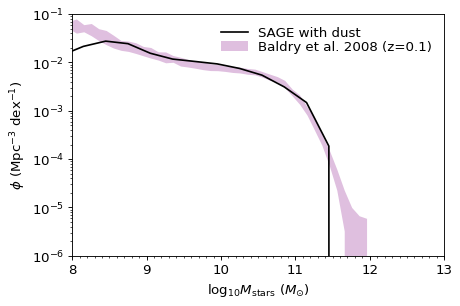

In [95]:
plt.figure()
ax = plt.subplot(111)

binwidth = 0.3

w = np.where(G_history[0].StellarMass > 0.0)[0]
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
#w1 = np.where(G_history[0]1.StellarMass > 0.0)[0]
#mass1 = np.log10(G_history[0]1.StellarMass[w1] * 1.e10 / Hubble_h)

mi = np.floor(min(mass)) - 2
#ma = np.floor(max(mass)) + 2
ma = 14
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)
#(counts1, binedges1) = np.histogram(mass1, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth
#xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='SAGE with dust')
#plt.plot(xaxeshisto1, counts1/ (BoxSize/Hubble_h)**3 / binwidth, 'k:', label='new metals & dust model')

# Baldry+ 2008 modified data used for the MCMC fitting
Baldry = np.array([
            [7.05, 1.3531e-01, 6.0741e-02],
            [7.15, 1.3474e-01, 6.0109e-02],
            [7.25, 2.0971e-01, 7.7965e-02],
            [7.35, 1.7161e-01, 3.1841e-02],
            [7.45, 2.1648e-01, 5.7832e-02],
            [7.55, 2.1645e-01, 3.9988e-02],
            [7.65, 2.0837e-01, 4.8713e-02],
            [7.75, 2.0402e-01, 7.0061e-02],
            [7.85, 1.5536e-01, 3.9182e-02],
            [7.95, 1.5232e-01, 2.6824e-02],
            [8.05, 1.5067e-01, 4.8824e-02],
            [8.15, 1.3032e-01, 2.1892e-02],
            [8.25, 1.2545e-01, 3.5526e-02],
            [8.35, 9.8472e-02, 2.7181e-02],
            [8.45, 8.7194e-02, 2.8345e-02],
            [8.55, 7.0758e-02, 2.0808e-02],
            [8.65, 5.8190e-02, 1.3359e-02],
            [8.75, 5.6057e-02, 1.3512e-02],
            [8.85, 5.1380e-02, 1.2815e-02],
            [8.95, 4.4206e-02, 9.6866e-03],
            [9.05, 4.1149e-02, 1.0169e-02],
            [9.15, 3.4959e-02, 6.7898e-03],
            [9.25, 3.3111e-02, 8.3704e-03],
            [9.35, 3.0138e-02, 4.7741e-03],
            [9.45, 2.6692e-02, 5.5029e-03],
            [9.55, 2.4656e-02, 4.4359e-03],
            [9.65, 2.2885e-02, 3.7915e-03],
            [9.75, 2.1849e-02, 3.9812e-03],
            [9.85, 2.0383e-02, 3.2930e-03],
            [9.95, 1.9929e-02, 2.9370e-03],
            [10.05, 1.8865e-02, 2.4624e-03],
            [10.15, 1.8136e-02, 2.5208e-03],
            [10.25, 1.7657e-02, 2.4217e-03],
            [10.35, 1.6616e-02, 2.2784e-03],
            [10.45, 1.6114e-02, 2.1783e-03],
            [10.55, 1.4366e-02, 1.8819e-03],
            [10.65, 1.2588e-02, 1.8249e-03],
            [10.75, 1.1372e-02, 1.4436e-03],
            [10.85, 9.1213e-03, 1.5816e-03],
            [10.95, 6.1125e-03, 9.6735e-04],
            [11.05, 4.3923e-03, 9.6254e-04],
            [11.15, 2.5463e-03, 5.0038e-04],
            [11.25, 1.4298e-03, 4.2816e-04],
            [11.35, 6.4867e-04, 1.6439e-04],
            [11.45, 2.8294e-04, 9.9799e-05],
            [11.55, 1.0617e-04, 4.9085e-05],
            [11.65, 3.2702e-05, 2.4546e-05],
            [11.75, 1.2571e-05, 1.2571e-05],
            [11.85, 8.4589e-06, 8.4589e-06],
            [11.95, 7.4764e-06, 7.4764e-06],
            ], dtype=np.float32)

Baldry_xval = np.log10(10 ** Baldry[:, 0]  /Hubble_h/Hubble_h)
Baldry_xval = Baldry_xval - 0.26  # convert back to Chabrier IMF
Baldry_yvalU = (Baldry[:, 1]+Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h
Baldry_yvalL = (Baldry[:, 1]-Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h

plt.fill_between(Baldry_xval, Baldry_yvalU, Baldry_yvalL, facecolor='purple', alpha=0.25, label='Baldry et al. 2008 (z=0.1)')

plt.yscale('log', nonposy='clip')
plt.axis([8.0, 13.0, 1.0e-6, 1.0e-1])

# Set the x-axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

#plt.savefig('plots/SMF-new-dust-full.png')
plt.show()

<ErrorbarContainer object of 3 artists>

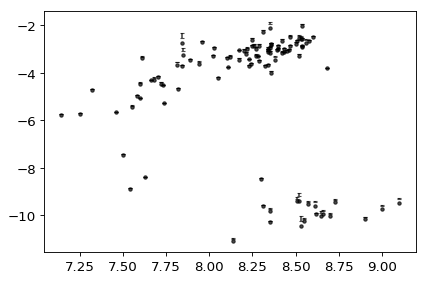

In [10]:
HI_rr, errHI_rr, Z_rr, H2_rr, atomic_rr, logdust_rr, logdust2_rr, dustpercent_rr, logstar_rr = np.loadtxt('remy-ruyers.txt', usecols=(1,2,3,5,6,9,7,8,10), unpack=True)

gas = atomic_rr* (HI_rr + H2_rr)
errHI = errHI_rr * HI_rr / 100
gas_err = atomic_rr * errHI
metal = (10 ** (Z_rr - 9)) * 0.02 * gas
metal_err = (10 ** (Z_rr - 9)) * 0.02 * gas_err

dust_rr = 10 ** logdust_rr
dust2_rr = 10 ** logdust2_rr
dusterr_rr = dustpercent_rr* dust_rr / 100
star_rr = 10 ** logstar_rr

logdustupper_rr = np.log10((dust_rr + dusterr_rr)/ dust_rr)
logdustlower_rr = np.log10((dust_rr - dusterr_rr)/ dust_rr)

w1 = np.where(gas > 0)[0]
logstar_rr = logstar_rr[w1]
logdust_rr = logdust_rr[w1]
logdustupper_rr = logdustupper_rr[w1]
logdustlower_rr = logdustlower_rr[w1]
Z_rr = Z_rr[w1]
gas_rr = gas[w1]
metal_rr = metal[w1]
DTG = dust_rr[w1] / gas[w1]
DTM = dust_rr[w1] / metal[w1]

dust_err = dustpercent_rr[w1]
gas_err = gas_err[w1]
metal_err = metal_err[w1]
DTG_err = np.zeros(len(dust_err))
DTM_err = np.zeros(len(dust_err))


for i in range(len(dust_err)):
    if (dust_err[i]>0):
        DTG_err[i] = DTG[i] * np.sqrt((dust_err[i]/100)**2 + (gas_err[i]/gas_rr[i])**2)
        DTM_err[i] = DTM[i] * np.sqrt((dust_err[i]/100)**2 + (metal_err[i]/metal_rr[i])**2)
    else:
        DTG_err[i] = DTG[i] * np.sqrt((gas_err[i]/gas_rr[i])**2)
        DTM_err[i] = DTM[i] * np.sqrt((metal_err[i]/metal_rr[i])**2)

DTG_rr = np.log10(DTG)
DTGerr_up = np.log10((DTG_err+DTG)/DTG)
DTGerr_low = np.log10((DTG-DTG_err)/DTG)
DTM_rr = np.log10(DTM)
DTMerr_up = np.log10((DTM_err+DTM)/DTM)
DTMerr_low = np.log10((DTM-DTM_err)/DTM)

'''
DTM = dust_rr[w1] / metal[w1]
DTMerr = DTM * np.sqrt((dustpercent_rr[w1]/100)**2 + (metal_err[w1]/metal[w1])**2)
DTM_rr = np.log10(DTM)
DTMerr_rr = np.log10((DTMerr+DTM)/DTM)
'''
plt.errorbar(Z_rr, DTG_rr, yerr=[DTGerr_low, DTGerr_up], fmt='k.', alpha=0.7, label='Remy-Ruyer et al. 2014')



In [ ]:
'''
plt.errorbar(star_rr, dust_rr, dusterr_rr, fmt='k.')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e7, 1e12)
plt.ylim(1e4, 1e10)
'''
G_history[0].ColdDust

In [ ]:
logdusterr_rr = np.log10((dusterr_rr + dust_rr) / dust_rr)
#plt.errorbar(np.log10(star_rr), np.log10(dust_rr), np.log10((dusterr_rr + dust_rr) / dust_rr), fmt='.')

## Dust - Stellar Mass

In [ ]:
import matplotlib.cm as cm
plt.figure()
ax = plt.subplot(111)

#w = np.where((G_history[0].StellarMass > 0) & (G_history[0].ColdDust > 0))[0]
w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[0].ColdDust * 1.e10 / Hubble_h > 1.e4))[0]
alldust = np.log10(G_history[0].ColdDust[w] * 1.e10 / Hubble_h)
allmass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
#if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
dust = np.log10(G_history[0].ColdDust[w] * 1.e10 / Hubble_h)

binwidth = 0.3
total_bins = int((max(allmass) - min(allmass)) / binwidth)
bins = np.linspace(allmass.min(), allmass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(allmass, bins)
median = [np.percentile(alldust[idx==k+1], 50) for k in range(total_bins)]
#plt.plot(bins-delta/2, tesmedian, 'k--', label='median')
perc1 = [np.percentile(alldust[idx==k+1], 16) for k in range(total_bins)]
perc2 = [np.percentile(alldust[idx==k+1], 84) for k in range(total_bins)]

    
#plt.scatter(mass, dust, marker='o', s=1, c='grey', alpha=0.2)
#plt.hist2d(mass, dust, 100, cmap=plt.cm.Greys)
heatmap, xedges, yedges = np.histogram2d(mass, dust, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=plt.cm.Greys)
#plt.contourf(mass, dust)
#plt.hexbin(mass, dust, cmap=plt.cm.viridis)
#plt.colorbar()
plt.plot(bins-delta/2, median, 'k-', linewidth=1.2)
#plt.fill_between(bins-delta/2, perc1, perc2, facecolor='b', alpha=0.2)
plt.plot(bins-delta/2, perc1, 'k--', linewidth=1.2)
plt.plot(bins-delta/2, perc2, 'k--', linewidth=1.2)

plt.errorbar(logstar_rr, logdust_rr, yerr=[logdustlower_rr, logdustupper_rr], fmt='ko', mfc='white', label="Remy-Ruyer+ 2014 (ac)")
plt.errorbar(np.log10(star_rr), np.log10(dust2_rr), np.log10((dusterr_rr + dust2_rr) / dust2_rr), fmt='k^',mfc='white', label="Remy-Ruyer+ 2014 (gr)")


#Data from Santini et al. 2014
logmass = (10, 10, 10, 10.25, 10.25, 10.25, 10.5, 10.5, 10.5, 10.75, 11)
logdust = (7.11, 7.06, 6.95, 6.83, 7.05, 7.44, 7.42, 7.55, 7.64, 7.71, 7.31)
low_err = (0.15, 0.13, 0.19, 0.13, 0.08, 0.07, 0.43, 0.14, 0.06, 0.1, 0.23)
upp_err = (0.26, 0.31, 0.3, 0.13, 0.12, 0.05, 0.07, 0.3, 0.04, 0.05, 0.26)
plt.errorbar(logmass, logdust, yerr=np.array([low_err, upp_err]), fmt='rv', mfc='white', label='Santini+ 2014')

#Data from Dustpedia (Nersesian et al. 2019)
logmass = (10.92, 10.94, 10.35, 10.48, 10.46, 10.74, 10.65, 10.48, 10.55, 10.40, 10.28, 9.83, 9.62, 9.27, 9.24, 9.08)
xerr = (0.05, 0.05, 0.09, 0.07, 0.06, 0.04, 0.08, 0.08, 0.08, 0.10, 0.09, 0.11, 0.11, 0.11, 0.12, 0.14)
logdust = (6.15, 6.6, 5.95, 6.12, 6.46, 6.74, 7.00, 7.01, 7.23, 7.31, 7.29, 6.94, 6.81, 6.46, 6.25, 5.93)
yerr = (0.38, 0.27, 0.28, 0.22, 0.13, 0.16, 0.09, 0.07, 0.07, 0.06, 0.07, 0.09, 0.11, 0.14, 0.17, 0.25)
plt.errorbar(logmass, logdust, yerr=yerr, xerr=xerr, fmt='bs', mfc='white', label='Nersesian+ 2019')
plt.xlim(8, 12)
plt.ylim(4, 10)
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')  # and the x-axis labels
plt.ylabel(r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

#plt.savefig('plots/dust-mass-new-millennium.png')


## DTG - Z

In [ ]:
plt.figure()
ax = plt.subplot(111)

metallicity= np.log10((G_history[0].MetalsColdGas / G_history[0].ColdGas) / 0.02) + 9
w = np.where((G_history[0].ColdDust > 0.0) & (metallicity < 9.5) & (metallicity > 6.5) & (G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8))[0]
DTG = np.log10(G_history[0].ColdDust[w] /G_history[0].ColdGas[w])
Z= np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9

binwidth = 0.08
total_bins = int((max(Z) - min(Z)) / binwidth)
bins = np.linspace(min(Z), max(Z), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(Z, bins)
median = [np.median(DTG[idx==k+1]) for k in range(total_bins)]
perc1 = [np.percentile(DTG[idx==k+1], 16) for k in range(total_bins)]
perc2 = [np.percentile(DTG[idx==k+1], 84) for k in range(total_bins)]

if(len(w) > dilute): w = sample(list(w), dilute)
Z = np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9
DTG = np.log10(G_history[0].ColdDust[w]/G_history[0].ColdGas[w]) 
plt.scatter(Z, DTG, marker='o', s=1, c='grey', alpha=0.3)
plt.plot(bins-delta/2, median, 'k-')
plt.plot(bins-delta/2, perc1, 'k--', linewidth=1.2)
plt.plot(bins-delta/2, perc2, 'k--', linewidth=1.2)
#plt.fill_between(bins-delta/2, perc1, perc2, facecolor='b', alpha=0.2)

plt.errorbar(Z_rr, DTG_rr, yerr=[DTGerr_low, DTGerr_up], fmt='k.', alpha=0.7, label='Remy-Ruyer et al. 2014')

plt.xlim(6.8, 10)
plt.ylim(-6, -1)
plt.xlabel(r'$12\ +\ \log_{10}[\mathrm{O/H}]$')
plt.ylabel(r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{gas}})$')
#print(max(DTG))

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/DTG-new-dust.png')


## DTG - Mass

In [ ]:
seed(2222)
plt.figure()
ax = plt.subplot(111)

w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[0].MetalsColdGas > 0) & (G_history[0].ColdDust > 0))[0]
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
DTG = np.log10(G_history[0].ColdDust[w]/G_history[0].ColdGas[w])

binwidth = 0.1
total_bins = int((max(mass) - min(mass)) / binwidth)
bins = np.linspace(mass.min(), mass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(mass, bins)
median = [np.percentile(DTG[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
perc1 = [np.percentile(DTG[idx==k+1], 16, interpolation='linear') for k in range(total_bins)]
perc2 = [np.percentile(DTG[idx==k+1], 84, interpolation='linear') for k in range(total_bins)]
    
#plt.scatter(Z, DTG, marker='o', s=1, c='k', alpha=0.3, label='SAGE with dust')
plt.plot(bins-delta/2, median, 'k-')
plt.plot(bins-delta/2, perc1, 'k--', linewidth=1.2)
plt.plot(bins-delta/2, perc2, 'k--', linewidth=1.2)
#plt.fill_between(bins-delta/2, perc1, perc2, facecolor='b', alpha=0.2)


if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
DTG = np.log10(G_history[0].ColdDust[w]/G_history[0].ColdGas[w])

plt.scatter(mass, DTG, marker='o', s=1, c='grey', alpha=0.3)
plt.errorbar(logstar_rr, DTG_rr, yerr=DTGerr_rr, fmt='k.', alpha=0.7, label='Remy-Ruyer et al. 2014')


plt.xlim(8, 12)
plt.ylim(-6, -1)
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$') 
plt.ylabel(r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{gas}})$')
#print(max(DTG))
leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/DTG-mass-new-dust.png')

## DTM - Z

In [ ]:
plt.figure()
ax = plt.subplot(111)

metallicity= np.log10((G_history[0].MetalsColdGas / G_history[0].ColdGas) / 0.02) + 9
w = np.where((G_history[0].ColdDust > 0.0) & (metallicity < 9.5) & (metallicity > 6.5) & (G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8))[0]
Z = np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9.0
DTM = np.log10(G_history[0].ColdDust[w]/G_history[0].MetalsColdGas[w])

binwidth = 0.08
total_bins = int((max(Z) - min(Z)) / binwidth)
bins = np.linspace(Z.min(), Z.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(Z, bins)
median = [np.mean(DTM[idx==k+1]) for k in range(total_bins)]
perc1 = [np.percentile(DTM[idx==k+1], 16, interpolation='linear') for k in range(total_bins)]
perc2 = [np.percentile(DTM[idx==k+1], 84, interpolation='linear') for k in range(total_bins)]
    
#plt.scatter(Z, DTG, marker='o', s=1, c='k', alpha=0.3, label='SAGE with dust')
plt.plot(bins-delta/2, median, 'k-')
plt.plot(bins-delta/2, perc1, 'k--', linewidth=1.2)
plt.plot(bins-delta/2, perc2, 'k--', linewidth=1.2)


if(len(w) > dilute): w = sample(list(w), dilute)
Z = np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9.0
DTM = np.log10(G_history[0].ColdDust[w]/G_history[0].MetalsColdGas[w])

plt.scatter(Z, DTM, marker='o', s=1, c='grey', alpha=0.3)
#plt.scatter(Z, DTM, marker='o', s=1, c='k', alpha=0.5, label='SAGE with dust')
plt.errorbar(Z_rr, DTM_rr, yerr=DTMerr_rr, fmt='k.', alpha=0.7, label='Remy-Ruyer et al. 2014')

plt.xlim(6.8, 10)
plt.ylim(-2.5, 1.0)
plt.xlabel(r'$12\ +\ \log_{10}[\mathrm{O/H}]$')
plt.ylabel(r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{metal}})$')
#print(max(DTG))

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/DTM-new-dust.png')

## DTM - Mass

In [ ]:
seed(2222)
plt.figure()
ax = plt.subplot(111)
w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[0].MetalsColdGas > 0) & (G_history[0].ColdDust > 0))[0]
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
DTM = np.log10(G_history[0].ColdDust[w]/G_history[0].MetalsColdGas[w])

binwidth = 0.1
total_bins = int((max(mass) - min(mass)) / binwidth)
bins = np.linspace(mass.min(), mass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(mass, bins)
median = [np.percentile(DTM[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
perc1 = [np.percentile(DTM[idx==k+1], 16, interpolation='linear') for k in range(total_bins)]
perc2 = [np.percentile(DTM[idx==k+1], 84, interpolation='linear') for k in range(total_bins)]
    
#plt.scatter(mass, DTM, marker='o', s=1, c='k', alpha=0.3, label='SAGE with dust')
plt.plot(bins-delta/2, median, 'k-')
plt.plot(bins-delta/2, perc1, 'k--', linewidth=1.2)
plt.plot(bins-delta/2, perc2, 'k--', linewidth=1.2)

if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
DTM = np.log10(G_history[0].ColdDust[w]/G_history[0].MetalsColdGas[w])
plt.scatter(mass, DTM, marker='o', s=1, c='grey', alpha=0.3)


#plt.scatter(mass, DTG, marker='o', s=1, c='k', alpha=0.5, label='SAGE with dust')
plt.errorbar(logstar_rr, DTM_rr, yerr=DTMerr_rr, fmt='k.', alpha=0.7, label='Remy-Ruyer et al. 2014')


plt.xlim(8, 12)
plt.ylim(-2.5, 1.0)
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$') 
plt.ylabel(r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{metal}})$')
#print(max(DTG))
leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.savefig('plots/DTG-mass-new-dust.png')

## Dust Mass Function

In [ ]:
plt.figure()
ax = plt.subplot(111)

binwidth = 0.2

w = np.where(G_history[0].ColdDust > 0.0)[0]
mass = np.log10(G_history[0].ColdDust[w] * 1.e10 / Hubble_h)

mi = np.floor(min(mass)) - 2
ma = np.floor(max(mass)) + 2
#ma = 10
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='SAGE with dust')

vlahakis_x = np.array([6.289, 6.543, 6.788, 7.034, 7.287, 7.542, 7.787, 8.038, 8.282, 8.536])
vlahakis_y = np.array([-1.928, -2.033, -2.122, -2.329, -2.554, -2.859, -3.344, -3.979, -4.844, -5.507])
vlahakis_yerr = np.array([(0.0, 0), (0.0, 0.0), (0.097, 0), (0.081, 0), (0.122, 0), (0.149, 0), (0.205, 0.177), (0.246, 0.138), (0.216, 0.448), (0.301, 0.163)]).T
vlahakis_yerr[0] = 10**vlahakis_y - 10**(vlahakis_y - vlahakis_yerr[0])
vlahakis_yerr[1] = 10**(vlahakis_y + vlahakis_yerr[1]) - 10**vlahakis_y
plt.errorbar(vlahakis_x, 10**vlahakis_y, vlahakis_yerr, fmt='r.', label='Vlahakis 2005')

clemens_x = np.array([6.405, 6.706, 7.003, 7.304, 7.605, 7.903, 8.196, 8.497, 8.798, 9.096])
clemens_y = np.array([-1.27, -1.696, -1.697, -1.829, -1.917, -2.212, -2.676, -3.454, -4.607, -5.749])
clemens_yerr = np.array([(0.719, 0.281), (0.322, 0.319), (0.273, 0.239), (0.186, 0.166), (0.112, 0.104), (0.094, 0.073), (0.0, 0.093), (0.126, 0.114), (0.361, 0.364), (0.0, 0.545)]).T
clemens_yerr[0] = 10**clemens_y - 10**(clemens_y - clemens_yerr[0])
clemens_yerr[1] = 10**(clemens_y + clemens_yerr[1]) - 10**clemens_y
plt.errorbar(clemens_x, 10**clemens_y, clemens_yerr, fmt='r^', label='Clemens 2013')

dunne_x = np.array([6.071, 6.318, 6.546, 6.784, 7.011, 7.243, 7.470, 7.711, 7.931, 8.178, 8.409])
dunne_y = np.array([-1.778, -2.391, -2.320, -1.991, -2.234, -2.517, -2.568, -2.675, -3.248, -4.048, -4.356])
dunne_yerr = np.array([(0.313, 0.313), (0.258, 0.234), (0.229, 0.188), (0.0, 0.117), (0.0, 0.0), (0.233, 0.083), (0.0, 0.0), (0.112, 0.082), (0.124, 0.118), (0.309, 0.301), (0.433, 0.431)]).T
dunne_yerr[0] = 10**dunne_y - 10**(dunne_y - dunne_yerr[0])
dunne_yerr[1] = 10**(dunne_y + dunne_yerr[1]) - 10**dunne_y
plt.errorbar(dunne_x, 10**dunne_y, dunne_yerr, fmt='r*', label='Dunne 2011')

plt.yscale('log', nonposy='clip')
plt.axis([6.0, 10.0, 1.0e-6, 1.0e-1])

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/DMF-new-dust.png')

In [ ]:
w = np.where(G_snap2.ColdDust > 0)[0]
mass2 = np.log10(G_snap2.ColdDust[w] * 1.e10 / Hubble_h)
min(G_snap2.ColdDust * 1.e10 / Hubble_h)

## Baryonic Mass Function

In [ ]:
plt.figure ()
ax = plt.subplot(111)

binwidth = 0.1

w = np.where(G_history[0].StellarMass + G_history[0].ColdGas > 0.0)[0]
mass = np.log10((G_history[0].StellarMass[w] + G_history[0].ColdGas[w]) * 1.0e10 / Hubble_h)

mi = np.floor(min(mass)) - 2
ma = np.floor(max(mass)) + 2
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='SAGE with dust')

# Bell et al. 2003 BMF (h=1.0 converted to h=0.73)
M = np.arange(7.0, 13.0, 0.01)
Mstar = np.log10(5.3*1.0e10 /Hubble_h/Hubble_h)
alpha = -1.21
phistar = 0.0108 * Hubble_h**3
xval = 10.0 ** (M-Mstar)
yval = np.log(10.) * phistar * xval ** (alpha+1) * np.exp(-xval)
plt.plot(np.log10(10.0**M /0.7 /1.8), yval, 'g--', lw=1.5, label='Bell et al. 2003')  # Plot the SMF

plt.yscale('log', nonposy='clip')
plt.axis([8.0, 12.5, 1.0e-6, 1.0e-1])

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$\log_{10}\ M_{\mathrm{bar}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

#plt.savefig('plots/BMF-bolshoi-H2.png')
plt.show()

## Gas Mass Function

In [ ]:
plt.figure ()
ax = plt.subplot(111)

binwidth = 0.3

w = np.where(G_history[0].ColdGas > 0.0)[0]
mass = np.log10(G_history[0].ColdGas[w] * 1.0e10 / Hubble_h)
H2 = np.log10(G_history[0].f_H2[w] * G_history[0].ColdGas[w] * 1.0e10 / Hubble_h)
HI = np.log10(G_history[0].f_HI[w] * G_history[0].ColdGas[w] * 1.0e10 / Hubble_h)

mi = np.floor(min(mass)) - 2
ma = np.floor(max(mass)) + 2
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)
(counts2, binedges2) = np.histogram(H2, range=(mi, ma), bins=NB)
(counts3, binedges3) = np.histogram(HI, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth
xaxeshisto2 = binedges2[:-1] + 0.5 * binwidth
xaxeshisto3 = binedges3[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='Cold gas')
plt.plot(xaxeshisto2, counts2/ (BoxSize/Hubble_h)**3 / binwidth, 'b-', label='H2')
plt.plot(xaxeshisto3, counts3/ (BoxSize/Hubble_h)**3 / binwidth, 'r-', label='HI')

Zwaan = np.array([[6.933,   -0.333],
            [7.057,   -0.490],
            [7.209,   -0.698],
            [7.365,   -0.667],
            [7.528,   -0.823],
            [7.647,   -0.958],
            [7.809,   -0.917],
            [7.971,   -0.948],
            [8.112,   -0.927],
            [8.263,   -0.917],
            [8.404,   -1.062],
            [8.566,   -1.177],
            [8.707,   -1.177],
            [8.853,   -1.312],
            [9.010,   -1.344],
            [9.161,   -1.448],
            [9.302,   -1.604],
            [9.448,   -1.792],
            [9.599,   -2.021],
            [9.740,   -2.406],
            [9.897,   -2.615],
            [10.053,  -3.031],
            [10.178,  -3.677],
            [10.335,  -4.448],
            [10.492,  -5.083]        ], dtype=np.float32)
        
ObrRaw = np.array([
            [7.300,   -1.104],
            [7.576,   -1.302],
            [7.847,   -1.250],
            [8.133,   -1.240],
            [8.409,   -1.344],
            [8.691,   -1.479],
            [8.956,   -1.792],
            [9.231,   -2.271],
            [9.507,   -3.198],
            [9.788,   -5.062 ]        ], dtype=np.float32)

ObrCold = np.array([
            [8.009,   -1.042],
            [8.215,   -1.156],
            [8.409,   -0.990],
            [8.604,   -1.156],
            [8.799,   -1.208],
            [9.020,   -1.333],
            [9.194,   -1.385],
            [9.404,   -1.552],
            [9.599,   -1.677],
            [9.788,   -1.812],
            [9.999,   -2.312],
            [10.172,  -2.656],
            [10.362,  -3.500],
            [10.551,  -3.635],
            [10.740,  -5.010]        ], dtype=np.float32)

ObrCold_xval = np.log10(10**(ObrCold[:, 0])  /Hubble_h/Hubble_h)
ObrCold_yval = (10**(ObrCold[:, 1]) * Hubble_h*Hubble_h*Hubble_h)
Zwaan_xval = np.log10(10**(Zwaan[:, 0]) /Hubble_h/Hubble_h)
Zwaan_yval = (10**(Zwaan[:, 1]) * Hubble_h*Hubble_h*Hubble_h)
ObrRaw_xval = np.log10(10**(ObrRaw[:, 0])  /Hubble_h/Hubble_h)
ObrRaw_yval = (10**(ObrRaw[:, 1]) * Hubble_h*Hubble_h*Hubble_h)

plt.plot(ObrCold_xval, ObrCold_yval, color='black', lw = 7, alpha=0.25, label='Obr. & Raw. 2009 (Cold Gas)')
plt.plot(Zwaan_xval, Zwaan_yval, color='red', lw = 7, alpha=0.25, label='Zwaan et al. 2005 (HI)')
plt.plot(ObrRaw_xval, ObrRaw_yval, color='blue', lw = 7, alpha=0.25, label='Obr. & Raw. 2009 (H2)')

plt.yscale('log', nonposy='clip')
plt.axis([8.0, 11.5, 1.0e-6, 1.0e-1])

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')
plt.xlabel(r'$\log_{10} M_{\mathrm{X}}\ (M_{\odot})$')

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/GMF-new-dust.png')    
plt.show()

## Baryonic Tully-Fisher

In [ ]:
seed(2222)
plt.figure()
ax = plt.subplot(111)

w = np.where((G_history[0].Type == 0) & (G_history[0].StellarMass + G_history[0].ColdGas > 0.0) &
            (G_history[0].BulgeMass / G_history[0].StellarMass > 0.1) & (G_history[0].BulgeMass / G_history[0].StellarMass > 0.5))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10((G_history[0].ColdGas[w] + G_history[0].StellarMass[w] )* 1.0e10 / Hubble_h)
vel = np.log10(G_history[0].Vmax[w])

plt.scatter(vel, mass, marker='o', s=1, c='k', alpha=0.5, label='Model Sb/c galaxies')

# overplot Stark, McGaugh & Swatters 2009 (assumes h=0.75? ... what IMF?)
w = np.arange(0.5, 10.0, 0.5)
TF = 3.94*w + 1.79
plt.plot(w, TF, 'b-', lw=2.0, label='Stark, McGaugh \& Swatters 2009')

plt.ylabel(r'$\log_{10}\ M_{\mathrm{bar}}\ (M_{\odot})$')
plt.xlabel(r'$\log_{10}V_{max}\ (km/s)$')

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([1.4, 2.6, 8.0, 12.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/GTF-mini.png')    
plt.show()

## Specific SFR

In [ ]:
seed(2222)

plt.figure()
ax = plt.subplot(111)

w = np.where(G_history[0].StellarMass > 0.01)[0]
if(len(w) > dilute): w = sample(list(w), dilute)
print(len(w))
mass = np.log10(G_history[0].StellarMass[w] * 1.0e10 / Hubble_h)
sSFR = np.log10( (G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w]) / (G_history[0].StellarMass[w] * 1.0e10 / Hubble_h) )
plt.scatter(mass, sSFR, marker='o', s=1, c='k', alpha=0.5, label='SAGE with dust')

# overplot dividing line between SF and passive
w = np.arange(7.0, 13.0, 1.0)
plt.plot(w, w/w*sSFRcut, 'b:', lw=2.0)

plt.ylabel(r'$\log_{10}\ s\mathrm{SFR}\ (\mathrm{yr^{-1}})$')
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, -16.0, -8.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/sSFR-mini.png')    
plt.show()

## Gas Fraction

In [ ]:
seed(2222)

w = np.where((G_history[0].Type == 0) & (G_history[0].StellarMass + G_history[0].ColdGas > 0.0) &
            (G_history[0].BulgeMass / G_history[0].StellarMass > 0.1) & (G_history[0].BulgeMass / G_history[0].StellarMass > 0.5))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_history[0].StellarMass[w]* 1.0e10 / Hubble_h)
fraction = G_history[0].ColdGas[w] / (G_history[0].StellarMass[w] + G_history[0].ColdGas[w])

plt.scatter(mass, fraction, marker='o', s=1, c='k', alpha=0.5, label='Sb/c galaxies')

plt.ylabel(r'$\mathrm{Cold\ Mass\ /\ (Cold+Stellar\ Mass)}$')
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, 0.0, 1.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/GasFraction-minipng')    
plt.show()

## Metallicity

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


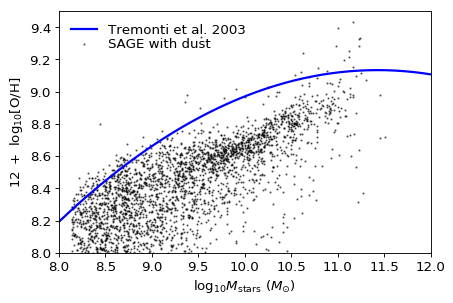

In [12]:
seed(2222)

w = np.where((G_history[0].Type == 0) & ( G_history[0].ColdGas / (G_history[0].StellarMass + G_history[0].ColdGas) > 0.0) &
            (G_history[0].StellarMass > 0.01))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
mass = np.log10(G_history[0].StellarMass[w]* 1.0e10 / Hubble_h)
Z = np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9.0

plt.scatter(mass, Z, marker='o', s=1, c='k', alpha=0.5, label='SAGE with dust')

# overplot Tremonti et al. 2003 (h=0.7)
w = np.arange(7.0, 13.0, 0.1)
Zobs = -1.492 + 1.847*w - 0.08026*w*w
plt.plot(np.log10((10**w *1.5 /1.8)), Zobs, 'b-', lw=2.0, label='Tremonti et al. 2003')

plt.ylabel(r'$12\ +\ \log_{10}[\mathrm{O/H}]$')
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$') 

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, 8.0, 9.5])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.savefig('plots/Metallicity-nodestruct.png')
#plt.show()

## Blackhole Bulge Relationship

In [ ]:
seed(2222)

w = np.where((G_history[0].BulgeMass > 0.01) & (G_history[0].BlackHoleMass > 0.00001))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
bh = np.log10(G_history[0].BlackHoleMass[w] * 1.0e10 / Hubble_h)
bulge = np.log10(G_history[0].BulgeMass[w] * 1.0e10 / Hubble_h)

plt.scatter(bulge, bh, marker='o', s=1, c='k', alpha=0.5, label='default')

# overplot Haring & Rix 2004
w = 10. ** np.arange(20)
BHdata = 10. ** (8.2 + 1.12 * np.log10(w / 1.0e11))
plt.plot(np.log10(w), np.log10(BHdata), 'b-', label="Haring \& Rix 2004")

plt.ylabel(r'$\log\ M_{\mathrm{BH}}\ (M_{\odot})$')  # Set the y...
plt.xlabel(r'$\log\ M_{\mathrm{bulge}}\ (M_{\odot})$')  # and the x-axis labels

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

plt.axis([8.0, 12.0, 6.0, 10.0])

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

#plt.savefig('plots/BBR-mini.png')
plt.show()

## Quiescent Fraction

In [ ]:
seed(2222)

groupscale = 12.5

w = np.where(G_history[0].StellarMass > 0.0)[0]
StellarMass = np.log10(G_history[0].StellarMass[w] * 1.0e10 / Hubble_h)
CentralMvir = np.log10(G_history[0].CentralMvir[w] * 1.0e10 / Hubble_h)
Type = G_history[0].Type[w]
sSFR = (G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w]) / (G_history[0].StellarMass[w] * 1.0e10 / Hubble_h)

MinRange = 9.5
MaxRange = 12.0
Interval = 0.1
Nbins = int((MaxRange-MinRange)/Interval)
Range = np.arange(MinRange, MaxRange, Interval)
        
Mass = []
Fraction = []
CentralFraction = []
SatelliteFraction = []
SatelliteFractionLo = []
SatelliteFractionHi = []

for i in range(Nbins-1):
            
    w = np.where((StellarMass >= Range[i]) & (StellarMass < Range[i+1]))[0]
    if len(w) > 0:
        wQ = np.where((StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut))[0]
        Fraction.append(1.0*len(wQ) / len(w))
    else:
        Fraction.append(0.0)

    w = np.where((Type == 0) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]))[0]
    if len(w) > 0:
        wQ = np.where((Type == 0) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut))[0]
        CentralFraction.append(1.0*len(wQ) / len(w))
    else:
        CentralFraction.append(0.0)

    w = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]))[0]
    if len(w) > 0:
        wQ = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut))[0]
        SatelliteFraction.append(1.0*len(wQ) / len(w))
        wQ = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut) & (CentralMvir < groupscale))[0]
        SatelliteFractionLo.append(1.0*len(wQ) / len(w))
        wQ = np.where((Type == 1) & (StellarMass >= Range[i]) & (StellarMass < Range[i+1]) & (sSFR < 10.0**sSFRcut) & (CentralMvir > groupscale))[0]
        SatelliteFractionHi.append(1.0*len(wQ) / len(w))                
    else:
        SatelliteFraction.append(0.0)
        SatelliteFractionLo.append(0.0)
        SatelliteFractionHi.append(0.0)
                
    Mass.append((Range[i] + Range[i+1]) / 2.0)

        
Mass = np.array(Mass)
Fraction = np.array(Fraction)
CentralFraction = np.array(CentralFraction)
SatelliteFraction = np.array(SatelliteFraction)
SatelliteFractionLo = np.array(SatelliteFractionLo)
SatelliteFractionHi = np.array(SatelliteFractionHi)

w = np.where(Fraction > 0)[0]
plt.plot(Mass[w], Fraction[w], c='k', label='All')

w = np.where(CentralFraction > 0)[0]
plt.plot(Mass[w], CentralFraction[w], color='Blue', label='Centrals')

w = np.where(SatelliteFraction > 0)[0]
plt.plot(Mass[w], SatelliteFraction[w], color='Red', label='Satellites')

w = np.where(SatelliteFractionLo > 0)[0]
plt.plot(Mass[w], SatelliteFractionLo[w], 'r--', label='Satellites-Lo')

w = np.where(SatelliteFractionHi > 0)[0]
plt.plot(Mass[w], SatelliteFractionHi[w], 'r-.', label='Satellites-Hi')


plt.xlabel(r'$\log_{10} M_{\mathrm{stellar}}\ (M_{\odot})$')  # Set the x-axis label
plt.ylabel(r'$\mathrm{Quescient\ Fraction}$')  # Set the y-axis label
            
# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
            
plt.axis([9.5, 11.2, 0.0, 1.05])

leg = plt.legend(loc='lower right')
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/QuiescentFraction-mini.png')

## Baryon Fraction

In [ ]:
seed(2222)

HaloMass = np.log10(G_history[0].Mvir * 1.0e10 / Hubble_h)
Baryons = G_history[0].StellarMass + G_history[0].ColdGas + G_history[0].HotGas + G_history[0].EjectedMass + G_history[0].IntraClusterStars + G_history[0].BlackHoleMass

MeanCentralHaloMass = []
MeanBaryonFraction = []
MeanBaryonFractionU = []
MeanBaryonFractionL = []

MeanStars = []
MeanCold = []
MeanHot = []
MeanEjected = []
MeanICS = []
MeanBH = []

MinHalo = 11.0
MaxHalo = 16.0
Interval = 0.1
Nbins = int((MaxHalo-MinHalo)/Interval)
HaloRange = np.arange(MinHalo, MaxHalo, Interval)

for i in range(Nbins-1):
    w1 = np.where((G_history[0].Type == 0) & (HaloMass >= HaloRange[i]) & (HaloMass < HaloRange[i+1]))[0]
    HalosFound = len(w1)

    if HalosFound > 2:
        
        BaryonFraction = []
        CentralHaloMass = []
                
        Stars = []
        Cold = []
        Hot = []
        Ejected = []
        ICS = []
        BH = []
        
        for j in range(HalosFound):
                    
            w2 = np.where(G_history[0].CentralGalaxyIndex == G_history[0].CentralGalaxyIndex[w1[j]])[0]
            CentralAndSatellitesFound = len(w2)
                    
            if CentralAndSatellitesFound > 0:
                BaryonFraction.append(sum(Baryons[w2]) / G_history[0].Mvir[w1[j]])
                CentralHaloMass.append(np.log10(G_history[0].Mvir[w1[j]] * 1.0e10 / Hubble_h))

                Stars.append(sum(G_history[0].StellarMass[w2]) / G_history[0].Mvir[w1[j]])
                Cold.append(sum(G_history[0].ColdGas[w2]) / G_history[0].Mvir[w1[j]])
                Hot.append(sum(G_history[0].HotGas[w2]) / G_history[0].Mvir[w1[j]])
                Ejected.append(sum(G_history[0].EjectedMass[w2]) / G_history[0].Mvir[w1[j]])
                ICS.append(sum(G_history[0].IntraClusterStars[w2]) / G_history[0].Mvir[w1[j]])
                BH.append(sum(G_history[0].BlackHoleMass[w2]) / G_history[0].Mvir[w1[j]])                        
                                
        MeanCentralHaloMass.append(np.mean(CentralHaloMass))
        MeanBaryonFraction.append(np.mean(BaryonFraction))
        MeanBaryonFractionU.append(np.mean(BaryonFraction) + np.var(BaryonFraction))
        MeanBaryonFractionL.append(np.mean(BaryonFraction) - np.var(BaryonFraction))
                
        MeanStars.append(np.mean(Stars))
        MeanCold.append(np.mean(Cold))
        MeanHot.append(np.mean(Hot))
        MeanEjected.append(np.mean(Ejected))
        MeanICS.append(np.mean(ICS))
        MeanBH.append(np.mean(BH))

#plt.plot(MeanCentralHaloMass, MeanBaryonFraction, 'k-', label='TOTAL')#, color='purple', alpha=0.3)
#plt.fill_between(MeanCentralHaloMass, MeanBaryonFractionU, MeanBaryonFractionL, facecolor='pink', alpha=0.25, label='TOTAL')
plt.fill_between(MeanCentralHaloMass, MeanBaryonFractionU, MeanBaryonFractionL, 
    facecolor='pink', alpha=0.25)
       
plt.plot(MeanCentralHaloMass, MeanStars, 'k--', label='Stars')
plt.plot(MeanCentralHaloMass, MeanCold, label='Cold', color='blue')
plt.plot(MeanCentralHaloMass, MeanHot, label='Hot', color='red')
plt.plot(MeanCentralHaloMass, MeanEjected, label='Ejected', color='green')
plt.plot(MeanCentralHaloMass, MeanICS, label='ICS', color='purple')


plt.xlabel(r'$\mathrm{Central}\ \log_{10} M_{\mathrm{vir}}\ (M_{\odot})$')  # Set the x-axis label
plt.ylabel(r'$\mathrm{Baryon\ Fraction}$')  # Set the y-axis label
            
# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
            
plt.axis([10.8, 15.0, 0.0, 0.23])
            
leg = plt.legend(bbox_to_anchor=[0.99, 0.6])
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/BaryonFraction-mini.png')

## Spin Distribution

In [ ]:
SpinParameter = np.sqrt(G_history[0].Spin[:,0]*G_history[0].Spin[:,0] + G_history[0].Spin[:,1]*G_history[0].Spin[:,1] + G_history[0].Spin[:,2]*G_history[0].Spin[:,2]) / (np.sqrt(2) * G_history[0].Vvir * G_history[0].Rvir);
mi = -0.02
ma = 0.5
binwidth = 0.01
NB = int((ma - mi) / binwidth)

(counts, binedges) = np.histogram(SpinParameter, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
#plt.plot(xaxeshisto, counts, 'k-', label='simulation')

# History

## Stellar Mass Function

In [ ]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure

whichimf = 0 #0=Chabrier, 1=Salpeter
binwidth = 0.1  # mass function histogram bin width

# Marchesini et al. 2009ApJ...701.1765M SMF, h=0.7
M = np.arange(7.0, 11.8, 0.01)
Mstar = np.log10(10.0**10.96)
alpha = -1.18
phistar = 30.87*1e-4
xval = 10.0 ** (M-Mstar)
yval = np.log(10.) * phistar * xval ** (alpha+1) * np.exp(-xval)
if(whichimf == 0):
    plt.plot(np.log10(10.0**M *1.6), yval, ':', lw=10, alpha=0.5, label='Marchesini et al. 2009 z=[0.1]')
elif(whichimf == 1):
    plt.plot(np.log10(10.0**M *1.6 /1.8), yval, ':', lw=10, alpha=0.5, label='Marchesini et al. 2009 z=[0.1]')

M = np.arange(9.3, 11.8, 0.01)
Mstar = np.log10(10.0**10.91)
alpha = -0.99
phistar = 10.17*1e-4
xval = 10.0 ** (M-Mstar)
yval = np.log(10.) * phistar * xval ** (alpha+1) * np.exp(-xval)
if(whichimf == 0):
    plt.plot(np.log10(10.0**M *1.6), yval, 'b:', lw=10, alpha=0.5, label='... z=[1.3,2.0]')
elif(whichimf == 1):
    plt.plot(np.log10(10.0**M *1.6/1.8), yval, 'b:', lw=10, alpha=0.5, label='... z=[1.3,2.0]')

M = np.arange(9.7, 11.8, 0.01)
Mstar = np.log10(10.0**10.96)
alpha = -1.01
phistar = 3.95*1e-4
xval = 10.0 ** (M-Mstar)
yval = np.log(10.) * phistar * xval ** (alpha+1) * np.exp(-xval)
if(whichimf == 0):
    plt.plot(np.log10(10.0**M *1.6), yval, 'g:', lw=10, alpha=0.5, label='... z=[2.0,3.0]')
elif(whichimf == 1):
    plt.plot(np.log10(10.0**M *1.6/1.8), yval, 'g:', lw=10, alpha=0.5, label='... z=[2.0,3.0]')

M = np.arange(10.0, 11.8, 0.01)
Mstar = np.log10(10.0**11.38)
alpha = -1.39
phistar = 0.53*1e-4
xval = 10.0 ** (M-Mstar)
yval = np.log(10.) * phistar * xval ** (alpha+1) * np.exp(-xval)
if(whichimf == 0):
    plt.plot(np.log10(10.0**M *1.6), yval, 'r:', lw=10, alpha=0.5, label='... z=[3.0,4.0]')
elif(whichimf == 1):
    plt.plot(np.log10(10.0**M *1.6/1.8), yval, 'r:', lw=10, alpha=0.5, label='... z=[3.0,4.0]')
    
###### z=0

w = np.where(G_history[0].StellarMass > 0.0)[0]
mass = np.log10(G_history[0].StellarMass[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)
print(mi, ma, NB)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='Model galaxies')

###### z=1.3

w = np.where(G_history[1].StellarMass > 0.0)[0]
mass = np.log10(G_history[1].StellarMass[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)
print(mi, ma, NB)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'b-')

###### z=2

w = np.where(G_history[2].StellarMass > 0.0)[0]
mass = np.log10(G_history[2].StellarMass[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)
print(mi, ma, NB)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 /binwidth, 'g-')

###### z=3

w = np.where(G_history[3].StellarMass > 0.0)[0]
mass = np.log10(G_history[3].StellarMass[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)
print(mi, ma, NB)

(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'r-')

######        

plt.yscale('log', nonposy='clip')

plt.axis([8.0, 12.5, 1.0e-6, 1.0e-1])

# Set the x-axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1}$)')  # Set the y...
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc='lower left', numpoints=1,
                         labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

#plt.savefig('plots/StellarMassFunction_z-millennium.png')

## SFR density evolution

In [ ]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure

ObsSFRdensity = np.array([
    [0, 0.0158489, 0, 0, 0.0251189, 0.01000000],
    [0.150000, 0.0173780, 0, 0.300000, 0.0181970, 0.0165959],
    [0.0425000, 0.0239883, 0.0425000, 0.0425000, 0.0269153, 0.0213796],
    [0.200000, 0.0295121, 0.100000, 0.300000, 0.0323594, 0.0269154],
    [0.350000, 0.0147911, 0.200000, 0.500000, 0.0173780, 0.0125893],
    [0.625000, 0.0275423, 0.500000, 0.750000, 0.0331131, 0.0229087],
    [0.825000, 0.0549541, 0.750000, 1.00000, 0.0776247, 0.0389045],
    [0.625000, 0.0794328, 0.500000, 0.750000, 0.0954993, 0.0660693],
    [0.700000, 0.0323594, 0.575000, 0.825000, 0.0371535, 0.0281838],
    [1.25000, 0.0467735, 1.50000, 1.00000, 0.0660693, 0.0331131],
    [0.750000, 0.0549541, 0.500000, 1.00000, 0.0389045, 0.0776247],
    [1.25000, 0.0741310, 1.00000, 1.50000, 0.0524807, 0.104713],
    [1.75000, 0.0562341, 1.50000, 2.00000, 0.0398107, 0.0794328],
    [2.75000, 0.0794328, 2.00000, 3.50000, 0.0562341, 0.112202],
    [4.00000, 0.0309030, 3.50000, 4.50000, 0.0489779, 0.0194984],
    [0.250000, 0.0398107, 0.00000, 0.500000, 0.0239883, 0.0812831],
    [0.750000, 0.0446684, 0.500000, 1.00000, 0.0323594, 0.0776247],
    [1.25000, 0.0630957, 1.00000, 1.50000, 0.0478630, 0.109648],
    [1.75000, 0.0645654, 1.50000, 2.00000, 0.0489779, 0.112202],
    [2.50000, 0.0831764, 2.00000, 3.00000, 0.0512861, 0.158489],
    [3.50000, 0.0776247, 3.00000, 4.00000, 0.0416869, 0.169824],
    [4.50000, 0.0977237, 4.00000, 5.00000, 0.0416869, 0.269153],
    [5.50000, 0.0426580, 5.00000, 6.00000, 0.0177828, 0.165959],
    [3.00000, 0.120226, 2.00000, 4.00000, 0.173780, 0.0831764],
    [3.04000, 0.128825, 2.69000, 3.39000, 0.151356, 0.109648],
    [4.13000, 0.114815, 3.78000, 4.48000, 0.144544, 0.0912011],
    [0.350000, 0.0346737, 0.200000, 0.500000, 0.0537032, 0.0165959],
    [0.750000, 0.0512861, 0.500000, 1.00000, 0.0575440, 0.0436516],
    [1.50000, 0.0691831, 1.00000, 2.00000, 0.0758578, 0.0630957],
    [2.50000, 0.147911, 2.00000, 3.00000, 0.169824, 0.128825],
    [3.50000, 0.0645654, 3.00000, 4.00000, 0.0776247, 0.0512861],
    ], dtype=np.float32)

ObsRedshift = ObsSFRdensity[:, 0]
xErrLo = ObsSFRdensity[:, 0]-ObsSFRdensity[:, 2]
xErrHi = ObsSFRdensity[:, 3]-ObsSFRdensity[:, 0]

ObsSFR = np.log10(ObsSFRdensity[:, 1])
yErrLo = np.log10(ObsSFRdensity[:, 1])-np.log10(ObsSFRdensity[:, 4])
yErrHi = np.log10(ObsSFRdensity[:, 5])-np.log10(ObsSFRdensity[:, 1])

# plot observational data (compilation used in Croton et al. 2006)
plt.errorbar(ObsRedshift, ObsSFR, yerr=[yErrLo, yErrHi], xerr=[xErrLo, xErrHi], color='g', lw=1.0, alpha=0.3, marker='o', ls='none', label='Observations')

SFR_density = np.zeros((len(redshift)))
for snap in range(len(redshift)):
    SFR_density[snap] = sum(G_history[snap].SfrDisk+G_history[snap].SfrBulge) / (BoxSize/Hubble_h)**3

z = np.array(redshift)
#nonzero = np.where(SFR_density > 0.0)[0]
plt.plot(z, np.log10(SFR_density), lw=3.0)
  
plt.ylabel(r'$\log_{10} \mathrm{SFR\ density}\ (M_{\odot}\ \mathrm{yr}^{-1}\ \mathrm{Mpc}^{-3})$')  # Set the y...
plt.xlabel(r'$\mathrm{redshift}$')  # and the x-axis labels

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.axis([0.0, 8.0, -3.0, -0.4])

#plt.savefig('plots/SFRdensity_z-mini.png')

## Stellar mass density evolution

In [ ]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure

# SMD observations taken from Marchesini+ 2009, h=0.7
# Values are (minz, maxz, rho,-err,+err)
dickenson2003 = np.array(((0.6,1.4,8.26,0.08,0.08),
                (1.4,2.0,7.86,0.22,0.33),
                (2.0,2.5,7.58,0.29,0.54),
                (2.5,3.0,7.52,0.51,0.48)),float)
drory2005 = np.array(((0.25,0.75,8.3,0.15,0.15),
            (0.75,1.25,8.16,0.15,0.15),
            (1.25,1.75,8.0,0.16,0.16),
            (1.75,2.25,7.85,0.2,0.2),
            (2.25,3.0,7.75,0.2,0.2),
            (3.0,4.0,7.58,0.2,0.2)),float)
# Perez-Gonzalez (2008)
pg2008 = np.array(((0.2,0.4,8.41,0.06,0.06),
            (0.4,0.6,8.37,0.04,0.04),
            (0.6,0.8,8.32,0.05,0.05),
            (0.8,1.0,8.24,0.05,0.05),
            (1.0,1.3,8.15,0.05,0.05),
            (1.3,1.6,7.95,0.07,0.07),
            (1.6,2.0,7.82,0.07,0.07),
            (2.0,2.5,7.67,0.08,0.08),
            (2.5,3.0,7.56,0.18,0.18),
            (3.0,3.5,7.43,0.14,0.14),
            (3.5,4.0,7.29,0.13,0.13)),float)
glazebrook2004 = np.array(((0.8,1.1,7.98,0.14,0.1),
                    (1.1,1.3,7.62,0.14,0.11),
                    (1.3,1.6,7.9,0.14,0.14),
                    (1.6,2.0,7.49,0.14,0.12)),float)
fontana2006 = np.array(((0.4,0.6,8.26,0.03,0.03),
                (0.6,0.8,8.17,0.02,0.02),
                (0.8,1.0,8.09,0.03,0.03),
                (1.0,1.3,7.98,0.02,0.02),
                (1.3,1.6,7.87,0.05,0.05),
                (1.6,2.0,7.74,0.04,0.04),
                (2.0,3.0,7.48,0.04,0.04),
                (3.0,4.0,7.07,0.15,0.11)),float)
rudnick2006 = np.array(((0.0,1.0,8.17,0.27,0.05),
                (1.0,1.6,7.99,0.32,0.05),
                (1.6,2.4,7.88,0.34,0.09),
                (2.4,3.2,7.71,0.43,0.08)),float)
elsner2008 = np.array(((0.25,0.75,8.37,0.03,0.03),
                (0.75,1.25,8.17,0.02,0.02),
                (1.25,1.75,8.02,0.03,0.03),
                (1.75,2.25,7.9,0.04,0.04),
                (2.25,3.0,7.73,0.04,0.04),
                (3.0,4.0,7.39,0.05,0.05)),float)

obs = (dickenson2003,drory2005,pg2008,glazebrook2004,
               fontana2006,rudnick2006,elsner2008)

for o in obs:
    xval = ((o[:,1]-o[:,0])/2.)+o[:,0]
    if(whichimf == 0):
        ax.errorbar(xval, np.log10(10**o[:,2] *1.6), xerr=(xval-o[:,0], o[:,1]-xval), yerr=(o[:,3], o[:,4]), alpha=0.3, lw=1.0, marker='o', ls='none')
    elif(whichimf == 1):
        ax.errorbar(xval, np.log10(10**o[:,2] *1.6/1.8), xerr=(xval-o[:,0], o[:,1]-xval), yerr=(o[:,3], o[:,4]), alpha=0.3, lw=1.0, marker='o', ls='none')

smd = np.zeros((len(redshift)))

for snap in range(len(redshift)):
    w = np.where((G_history[snap].StellarMass/Hubble_h > 0.01) & (G_history[snap].StellarMass/Hubble_h < 1000.0))[0]
    if(len(w) > 0):
        smd[snap] = sum(G_history[snap].StellarMass[w]) *1.0e10/Hubble_h / (BoxSize/Hubble_h)**3
z = np.array(redshift)

plt.plot(z, np.log10(smd), 'k-', lw=3.0)
plt.ylabel(r'$\log_{10}\ \phi\ (M_{\odot}\ \mathrm{Mpc}^{-3})$')  # Set the y...
plt.xlabel(r'$\mathrm{redshift}$')  # and the x-axis labels

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.axis([0.0, 4.2, 6.5, 9.0])

#plt.savefig('plots/StellarMassDensity_z-mini.png')

## Dust mass function Evolution

In [ ]:
#plt.figure(figsize=(10,5))

binwidth = 0.3  # mass function histogram bin width

###### z=0

w = np.where(G_history[0].ColdDust > 0.0)[0]
mass = np.log10(G_history[0].ColdDust[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)


(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-', label='z=0')

vlahakis_x = np.array([6.289, 6.543, 6.788, 7.034, 7.287, 7.542, 7.787, 8.038, 8.282, 8.536])
vlahakis_y = np.array([-1.928, -2.033, -2.122, -2.329, -2.554, -2.859, -3.344, -3.979, -4.844, -5.507])
vlahakis_yerr = np.array([(0.0, 0), (0.0, 0.0), (0.097, 0), (0.081, 0), (0.122, 0), (0.149, 0), (0.205, 0.177), (0.246, 0.138), (0.216, 0.448), (0.301, 0.163)]).T
vlahakis_yerr[0] = 10**vlahakis_y - 10**(vlahakis_y - vlahakis_yerr[0])
vlahakis_yerr[1] = 10**(vlahakis_y + vlahakis_yerr[1]) - 10**vlahakis_y
plt.errorbar(vlahakis_x, 10**vlahakis_y, vlahakis_yerr, fmt='k.', label='Vlahakis 2005')

clemens_x = np.array([6.405, 6.706, 7.003, 7.304, 7.605, 7.903, 8.196, 8.497, 8.798, 9.096])
clemens_y = np.array([-1.27, -1.696, -1.697, -1.829, -1.917, -2.212, -2.676, -3.454, -4.607, -5.749])
clemens_yerr = np.array([(0.719, 0.281), (0.322, 0.319), (0.273, 0.239), (0.186, 0.166), (0.112, 0.104), (0.094, 0.073), (0.0, 0.093), (0.126, 0.114), (0.361, 0.364), (0.0, 0.545)]).T
clemens_yerr[0] = 10**clemens_y - 10**(clemens_y - clemens_yerr[0])
clemens_yerr[1] = 10**(clemens_y + clemens_yerr[1]) - 10**clemens_y
plt.errorbar(clemens_x, 10**clemens_y, clemens_yerr, fmt='k^', label='Clemens 2013')

dunne_x = np.array([6.071, 6.318, 6.546, 6.784, 7.011, 7.243, 7.470, 7.711, 7.931, 8.178, 8.409])
dunne_y = np.array([-1.778, -2.391, -2.320, -1.991, -2.234, -2.517, -2.568, -2.675, -3.248, -4.048, -4.356])
dunne_yerr = np.array([(0.313, 0.313), (0.258, 0.234), (0.229, 0.188), (0.0, 0.117), (0.0, 0.0), (0.233, 0.083), (0.0, 0.0), (0.112, 0.082), (0.124, 0.118), (0.309, 0.301), (0.433, 0.431)]).T
dunne_yerr[0] = 10**dunne_y - 10**(dunne_y - dunne_yerr[0])
dunne_yerr[1] = 10**(dunne_y + dunne_yerr[1]) - 10**dunne_y
plt.errorbar(dunne_x, 10**dunne_y, dunne_yerr, fmt='k*', label='Dunne 2011')

###### z=1.3

w = np.where(G_history[1].ColdDust > 0.0)[0]
mass = np.log10(G_history[1].ColdDust[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)


(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'b-', label='z=1.3')

eales_x = np.array([9.632])
eales_y = np.array([-4.096])
eales_yerr = np.array([(0.262, 0.238)]).T
eales_yerr[0] = 10**eales_y - 10**(eales_y - eales_yerr[0])
eales_yerr[1] = 10**(eales_y + eales_yerr[1]) - 10**eales_y
plt.errorbar(eales_x, 10**eales_y, eales_yerr, fmt='b.', label='Eales 2009')


###### z=2

w = np.where(G_history[2].ColdDust > 0.0)[0]
mass = np.log10(G_history[2].ColdDust[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)
(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 /binwidth, 'g-', label='z=2')

dunne03_x = np.array([9.376, 9.251, 9.096, 8.900, 8.675, 8.360])
dunne03_y = np.array([-4.45, -4.276, -3.560, -3.29, -2.993, -2.822])
dunne03_yerr = np.array([(0.224, 0.070), (0.2, 0.146), (0, 0), (0, 0), (0.285, 0.17), (0, 0.337)]).T
dunne03_yerr[0] = 10**dunne03_y - 10**(dunne03_y - dunne03_yerr[0])
dunne03_yerr[1] = 10**(dunne03_y + dunne03_yerr[1]) - 10**dunne03_y
plt.errorbar(dunne03_x, 10**dunne03_y, dunne03_yerr, fmt='g.', label='Dunne 2003')


###### z=3

w = np.where(G_history[3].ColdDust > 0.0)[0]
mass = np.log10(G_history[3].ColdDust[w] * 1.0e10 /Hubble_h)

mi = np.int(np.floor(min(mass)) - 2)
ma = np.int(np.floor(max(mass)) + 2)
NB = np.int((ma - mi) / binwidth)


(counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto = binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'r-', label='z=3')      

plt.yscale('log', nonposy='clip')

plt.axis([6.0, 10.0, 1.0e-6, 1.0e-1])

# Set the x-axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1}$)')  # Set the y...
plt.xlabel(r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc='lower left', numpoints=1,
                         labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

#plt.savefig('plots/DustMassFunction_z-dwekpoppingasano-mini.png')

/Users/dtriani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
No handles with labels found to put in legend.


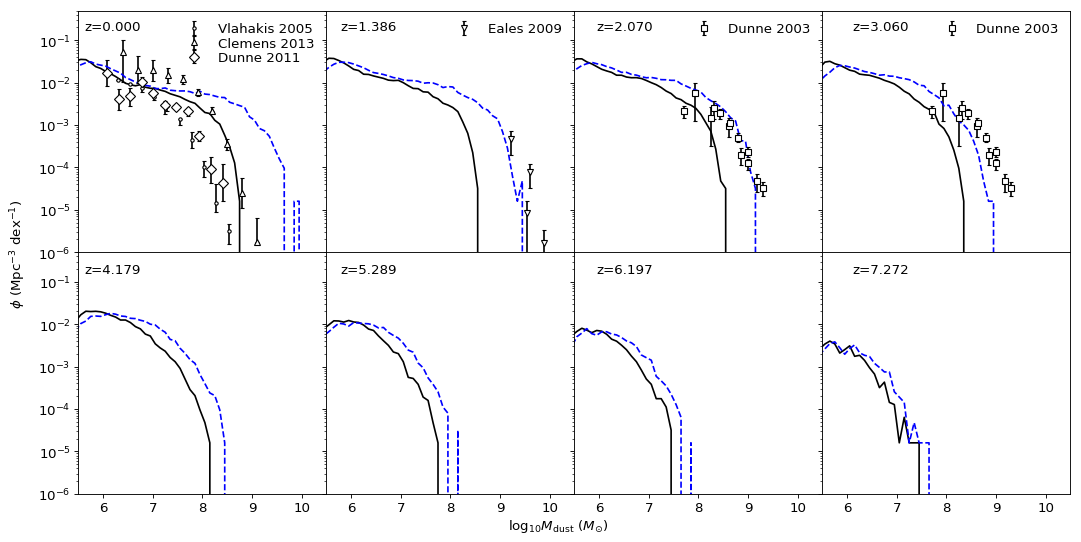

In [14]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(16, 8))

for i in range(8):
    ax1 = plt.subplot(2,4,i+1)
    binwidth = 0.1  # mass function histogram bin width

    w = np.where(G_history[i].ColdDust > 0.0)[0]
    mass = np.log10(G_history[i].ColdDust[w] * 1.0e10 /Hubble_h)

    mi = np.int(np.floor(min(mass)) - 2)
    ma = np.int(np.floor(max(mass)) + 2)
    NB = np.int((ma - mi) / binwidth)

    (counts, binedges) = np.histogram(mass, range=(mi, ma), bins=NB)

    # Set the x-axis values to be the centre of the bins
    xaxeshisto = binedges[:-1] + 0.5 * binwidth

    # Overplot the model histograms
    plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'k-')

    w = np.where(G_history[i].ColdDust + G_history[i].HotDust + G_history[i].EjectedDust> 0.0)[0]
    allmass = np.log10((G_history[i].ColdDust[w] + G_history[i].HotDust[w] + G_history[i].EjectedDust[w])* 1.0e10 /Hubble_h)
    mi = np.int(np.floor(min(allmass)) - 2)
    ma = np.int(np.floor(max(allmass)) + 2)
    NB = np.int((ma - mi) / binwidth)

    (counts, binedges) = np.histogram(allmass, range=(mi, ma), bins=NB)

    # Set the x-axis values to be the centre of the bins
    xaxeshisto = binedges[:-1] + 0.5 * binwidth

    # Overplot the model histograms
    plt.plot(xaxeshisto, counts / (BoxSize/Hubble_h)**3 / binwidth, 'b--')



    plt.yscale('log', nonposy='clip')
    plt.axis([5.5, 10.5, 1.0e-6, 5e-1])


plt.subplot(241)
vlahakis_x = np.array([6.289, 6.543, 6.788, 7.034, 7.287, 7.542, 7.787, 8.038, 8.282, 8.536])
vlahakis_y = np.array([-1.928, -2.033, -2.122, -2.329, -2.554, -2.859, -3.344, -3.979, -4.844, -5.507])
vlahakis_yerr = np.array([(0.0, 0), (0.0, 0.0), (0.097, 0), (0.081, 0), (0.122, 0), (0.149, 0), (0.205, 0.177), (0.246, 0.138), (0.216, 0.448), (0.301, 0.163)]).T
vlahakis_yerr[0] = 10**vlahakis_y - 10**(vlahakis_y - vlahakis_yerr[0])
vlahakis_yerr[1] = 10**(vlahakis_y + vlahakis_yerr[1]) - 10**vlahakis_y
plt.errorbar(vlahakis_x, 10**vlahakis_y, vlahakis_yerr, fmt='k.', mfc='white', label='Vlahakis 2005')

clemens_x = np.array([6.405, 6.706, 7.003, 7.304, 7.605, 7.903, 8.196, 8.497, 8.798, 9.096])
clemens_y = np.array([-1.27, -1.696, -1.697, -1.829, -1.917, -2.212, -2.676, -3.454, -4.607, -5.749])
clemens_yerr = np.array([(0.719, 0.281), (0.322, 0.319), (0.273, 0.239), (0.186, 0.166), (0.112, 0.104), (0.094, 0.073), (0.0, 0.093), (0.126, 0.114), (0.361, 0.364), (0.0, 0.545)]).T
clemens_yerr[0] = 10**clemens_y - 10**(clemens_y - clemens_yerr[0])
clemens_yerr[1] = 10**(clemens_y + clemens_yerr[1]) - 10**clemens_y
plt.errorbar(clemens_x, 10**clemens_y, clemens_yerr, fmt='k^', mfc='white', label='Clemens 2013')

dunne_x = np.array([6.071, 6.318, 6.546, 6.784, 7.011, 7.243, 7.470, 7.711, 7.931, 8.178, 8.409])
dunne_y = np.array([-1.778, -2.391, -2.320, -1.991, -2.234, -2.517, -2.568, -2.675, -3.248, -4.048, -4.356])
dunne_yerr = np.array([(0.313, 0.313), (0.258, 0.234), (0.229, 0.188), (0.0, 0.117), (0.0, 0.0), (0.233, 0.083), (0.0, 0.0), (0.112, 0.082), (0.124, 0.118), (0.309, 0.301), (0.433, 0.431)]).T
dunne_yerr[0] = 10**dunne_y - 10**(dunne_y - dunne_yerr[0])
dunne_yerr[1] = 10**(dunne_y + dunne_yerr[1]) - 10**dunne_y
plt.errorbar(dunne_x, 10**dunne_y, dunne_yerr, fmt='kD',mfc='white', label='Dunne 2011')

leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(242).set_xticklabels([])
plt.subplot(242).set_yticklabels([])

eales_x = np.array([9.600, 9.216, 9.546, 9.88])
eales_y = np.array([-4.102, -3.335, -5.080, -5.790])
eales_yerr = np.array([(0.377, 0.178), (0.365, 0.196), (1.909, 0.29), (1.194, 0.305)]).T
eales_yerr[0] = 10**eales_y - 10**(eales_y - eales_yerr[0])
eales_yerr[1] = 10**(eales_y + eales_yerr[1]) - 10**eales_y
plt.errorbar(eales_x, 10**eales_y, eales_yerr, fmt='kv',mfc='white', label='Eales 2009')

leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(243).set_xticklabels([])
plt.subplot(243).set_yticklabels([])

dunne03_x = np.array([7.718, 8.259, 8.795, 8.616, 8.99, 9.179, 9.301, 8.852, 9.002, 8.435, 8.640, 8.313, 7.934])
dunne03_y = np.array([-2.675, -2.830, -3.305, -3.015, -3.629, -4.309, -4.494, -3.699, -3.893, -2.711, -2.955, -2.590, -2.256])
dunne03_yerr = np.array([(0.160, 0.121), (0.674, 0.248), (0.091, 0.106), (0.271, 0.169), (0.117, 0.118), (0.275, 0.148), (0.172, 0.156), (0.233, 0.15), (0.157, 0.089), (0.149, 0.094), (0.111, 0.085), (0.271, 0.145), (0.654, 0.256)]).T
dunne03_yerr[0] = 10**dunne03_y - 10**(dunne03_y - dunne03_yerr[0])
dunne03_yerr[1] = 10**(dunne03_y + dunne03_yerr[1]) - 10**dunne03_y
plt.errorbar(dunne03_x, 10**dunne03_y, dunne03_yerr, fmt='ks',mfc='white', label='Dunne 2003')
leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(244).set_xticklabels([])
plt.subplot(244).set_yticklabels([])
dunne03_x = np.array([7.718, 8.259, 8.795, 8.616, 8.99, 9.179, 9.301, 8.852, 9.002, 8.435, 8.640, 8.313, 7.934])
dunne03_y = np.array([-2.675, -2.830, -3.305, -3.015, -3.629, -4.309, -4.494, -3.699, -3.893, -2.711, -2.955, -2.590, -2.256])
dunne03_yerr = np.array([(0.160, 0.121), (0.674, 0.248), (0.091, 0.106), (0.271, 0.169), (0.117, 0.118), (0.275, 0.148), (0.172, 0.156), (0.233, 0.15), (0.157, 0.089), (0.149, 0.094), (0.111, 0.085), (0.271, 0.145), (0.654, 0.256)]).T
dunne03_yerr[0] = 10**dunne03_y - 10**(dunne03_y - dunne03_yerr[0])
dunne03_yerr[1] = 10**(dunne03_y + dunne03_yerr[1]) - 10**dunne03_y
plt.errorbar(dunne03_x, 10**dunne03_y, dunne03_yerr, fmt='ks', mfc='white',label='Dunne 2003')
leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(246).set_yticklabels([])
plt.subplot(247).set_yticklabels([])
plt.subplot(248).set_yticklabels([])

leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.5, 0.07, r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$', ha='center')
fig.text(0.07, 0.5, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1}$)', va='center', rotation='vertical')
fig.text(0.13,0.85, 'z=0.000')
fig.text(0.33,0.85, 'z=1.386')
fig.text(0.53,0.85, 'z=2.070')
fig.text(0.73,0.85, 'z=3.060')
fig.text(0.13,0.47, 'z=4.179')
fig.text(0.33,0.47, 'z=5.289')
fig.text(0.53,0.47, 'z=6.197')
fig.text(0.73,0.47, 'z=7.272')

plt.savefig('plots/DMFEvolution-nodestruct.png')

## Rate - Stellar Mass Evolution

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4392: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/dtriani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, 

Text(0.75, 0.45, 'z=7.272')

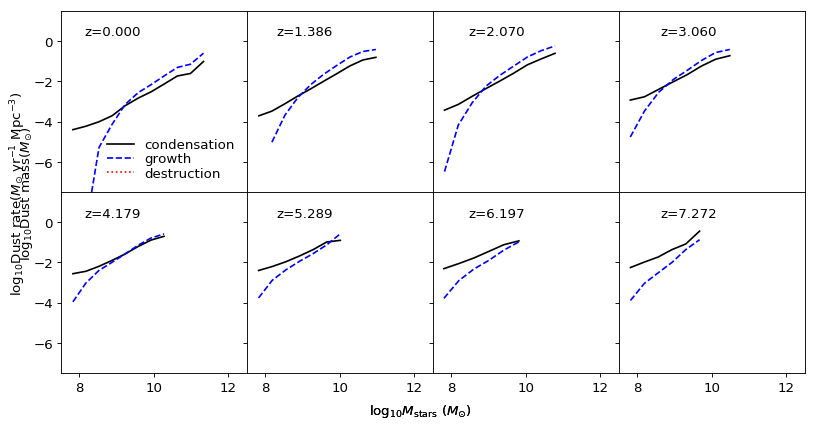

In [15]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12, 6))

for i in range(8):
    ax1 = plt.subplot(2,4,i+1)
    w = np.where((G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[i].ColdDust > 0))[0]
    if(len(w) > 150000): w = sample(list(w), 150000)
    mass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
    form = np.log10(G_history[i].dustdotform[w])  
    growth = np.log10(G_history[i].dustdotgrowth[w])
    destruct = np.log10(G_history[i].dustdotdestruct[w])

    binwidth = 0.3
    total_bins = int((max(mass) - min(mass)) / binwidth)

    bins = np.linspace(mass.min(), mass.max(), total_bins)
    delta = bins[1]-bins[0]
    idx = np.digitize(mass, bins)
    medianf = [np.percentile(form[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
    mediang = [np.percentile(growth[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
    mediand = [np.percentile(destruct[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
    #perc1 = [np.percentile(form[idx==k+1], 16, interpolation='linear') for k in range(total_bins)]
    #perc2 = [np.percentile(form[idx==k+1], 84, interpolation='linear') for k in range(total_bins)]

    #plt.scatter(mass, form, marker='o', s=1, c='white', alpha=0.5, label='z = '+ f'{redshift[i]:.3f}')
    plt.plot(bins-delta/2, medianf, 'k-', label='condensation')
    plt.plot(bins-delta/2, mediang, 'b--', label='growth')
    plt.plot(bins-delta/2, mediand, 'r:', label='destruction')

    plt.axis([7.5, 12.5, -7.5, 1.5])
    
plt.subplot(241).set_xticklabels([])
leg = plt.legend(loc='lower right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')


plt.subplot(242).set_xticklabels([])
plt.subplot(242).set_yticklabels([])
plt.subplot(243).set_xticklabels([])
plt.subplot(243).set_yticklabels([])
plt.subplot(244).set_xticklabels([])
plt.subplot(244).set_yticklabels([])
plt.subplot(246).set_yticklabels([])
plt.subplot(247).set_yticklabels([])
plt.subplot(248).set_yticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.5, 0.04, r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$', ha='center')
fig.text(0.07, 0.5, r'$\log_{10} \mathrm{Dust\ rate} (M_{\odot}\ \mathrm{yr}^{-1}\ \mathrm{Mpc}^{-3})$', va='center', rotation='vertical')
fig.text(0.5, 0.04, r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$', ha='center')
fig.text(0.08, 0.5, r'$\log_{10} \mathrm{Dust\ mass} (M_{\odot})$', va='center', rotation='vertical')
fig.text(0.15,0.83, 'z=0.000')
fig.text(0.35,0.83, 'z=1.386')
fig.text(0.55,0.83, 'z=2.070')
fig.text(0.75,0.83, 'z=3.060')
fig.text(0.15,0.45, 'z=4.179')
fig.text(0.35,0.45, 'z=5.289')
fig.text(0.55,0.45, 'z=6.197')
fig.text(0.75,0.45, 'z=7.272')
#plt.savefig('plots/DustRate-mass_z_new-millennium.png')

## Mass - age distribution

In [ ]:
# For Milkyway like galaxy
mass = G_history[0].StellarMass * 1.e10 /Hubble_h
bulge = G_history[0].BulgeMass * 1.e10 /Hubble_h
morph = bulge / mass
sfr = G_history[0].SfrDisk + G_history[0].SfrDisk
ws = np.where((mass > 5.7e10) & (mass < 5.9e10) & (morph < 0.4) & (sfr > 1))[0]
GalID1 = G_history[0].GalaxyIndex[ws[3]]
we = np.where((mass > 1e11) & (morph > 0.7) & (sfr == 0))[0]
GalID2 = G_history[0].GalaxyIndex[we[0]]

print(mass[ws[3]], morph[ws[3]], sfr[ws[3]])
print(mass[we[0]], morph[we[0]], sfr[we[0]])

dustmass1 = [0] * len(redshift)
dustmass2 = [0] * len(redshift)

for i in range(len(redshift)):
    ws = np.where(G_history[i].GalaxyIndex == GalID1)[0]
    if (len(ws) > 0):
        dustmass1[i] = np.log10(G_history[i].ColdDust[ws[0]] * 1.e10 / Hubble_h)
        if dustmass1[i] < 0:
            dustmass1[i] = 0
        we = np.where(G_history[i].GalaxyIndex == GalID2)[0]
    if (len(we) > 0):
        dustmass2[i] = np.log10(G_history[i].ColdDust[we[0]] * 1.e10 / Hubble_h)
        if dustmass2[i] < 0:
            dustmass2[i] = 0
    
plt.plot(redshift, dustmass1, label = "spiral")
plt.plot(redshift, dustmass2, label = "elliptical")

plt.ylabel(r'$\log_{10} \mathrm{Dust\ mass}\ (M_{\odot})$')  # Set the y...
plt.xlabel(r'$\mathrm{redshift}$')  # and the x-axis labels

#plt.axis([0.0, 8.0, -6, -3])

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

leg = plt.legend(loc=0, numpoints=1,
                         labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

#plt.savefig('plots/mass-age-new-dust.png')

## Evolution of dust in reservoirs

/Users/dtriani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


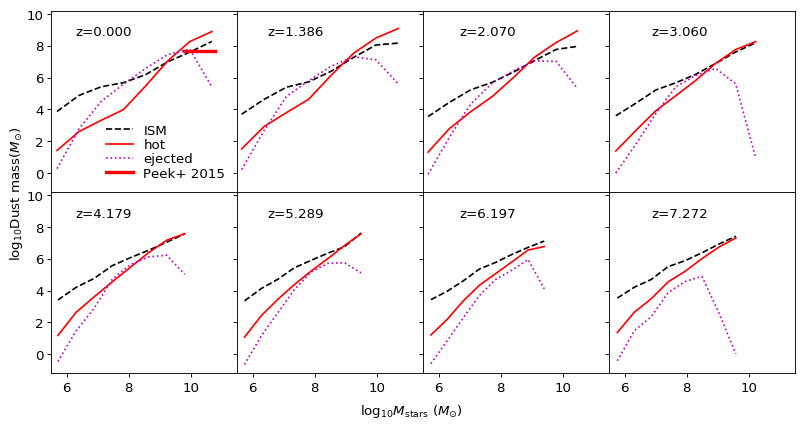

In [17]:
fig, axes = plt.subplots(2, 4, sharey=True, figsize=(12, 6))

for i in range(8):
    ax1 = plt.subplot(2,4,i+1)
    w = np.where((G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e6) & (G_history[i].EjectedDust > 0) & (G_history[i].HotDust > 0) & (G_history[i].ColdDust>0))[0]
    if(len(w) > 500): w = sample(list(w), 500)
    mass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
    ISM = np.log10(G_history[i].ColdDust[w]*  1.e10 / Hubble_h)  
    hot = np.log10(G_history[i].HotDust[w]*  1.e10 / Hubble_h)
    ejected = np.log10(G_history[i].EjectedDust[w]*  1.e10 / Hubble_h)

    total_bins = 8
    bins = np.linspace(mass.min(), mass.max(), total_bins)
    delta = bins[1]-bins[0]
    idx = np.digitize(mass, bins)
    medianI = [np.percentile(ISM[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
    medianh = [np.percentile(hot[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
    mediane = [np.percentile(ejected[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]

    plt.plot(bins-delta/2, medianI, 'k--', label='ISM')
    plt.plot(bins-delta/2, medianh, 'r-', label='hot')
    plt.plot(bins-delta/2, mediane, 'm:', label='ejected')

#    plt.scatter(mass, ISM, marker='o', s=1, c='white', alpha=0.5, label='z = '+ f'{redshift[i]:.3f}')
#    plt.scatter(mass, ISM, marker='o', s=1, c='k', alpha=0.5, label='ISM')
#    plt.scatter(mass, ejected, marker='o', s=1, c='orange', alpha=0.5, label='Ejected')
#    plt.scatter(mass, hot, marker='o', s=1, c='r', alpha=0.5, label='Hot')
    plt.axis([5.5, 11.5, -1.2, 10.2])


plt.subplot(241).set_xticklabels([])
x = np.arange(6e9, 6e10, 1e9)
y = x ** 0.23 + 5e7
logx = np.log10(x)
logy = np.log10(y)
plt.plot(logx, logy, 'r-', linewidth=3, label='Peek+ 2015')
leg = plt.legend(loc='lower right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
        
plt.subplot(242).set_xticklabels([])
plt.subplot(242).set_yticklabels([])
plt.subplot(243).set_xticklabels([])
plt.subplot(243).set_yticklabels([])
plt.subplot(244).set_xticklabels([])
plt.subplot(244).set_yticklabels([])
plt.subplot(246).set_yticklabels([])
plt.subplot(247).set_yticklabels([])
plt.subplot(248).set_yticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.5, 0.04, r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$', ha='center')
fig.text(0.08, 0.5, r'$\log_{10} \mathrm{Dust\ mass} (M_{\odot})$', va='center', rotation='vertical')
fig.text(0.15,0.83, 'z=0.000')
fig.text(0.35,0.83, 'z=1.386')
fig.text(0.55,0.83, 'z=2.070')
fig.text(0.75,0.83, 'z=3.060')
fig.text(0.15,0.45, 'z=4.179')
fig.text(0.35,0.45, 'z=5.289')
fig.text(0.55,0.45, 'z=6.197')
fig.text(0.75,0.45, 'z=7.272')
plt.savefig('plots/DustMass-evol_nodestruct.png')

## Dust rate density evolution

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


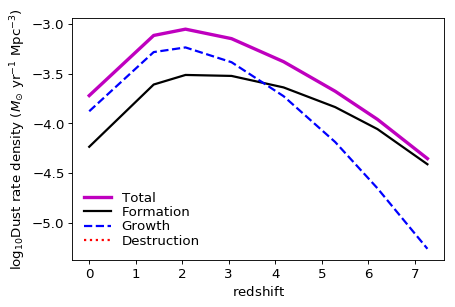

In [18]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure

total_density = np.zeros((len(redshift)))
formation = np.zeros((len(redshift)))
accretion = np.zeros((len(redshift)))
destruction = np.zeros((len(redshift)))

for snap in range(len(redshift)):
    formation[snap] = sum(G_history[snap].dustdotform) / (BoxSize/Hubble_h)**3
    accretion[snap] = sum(G_history[snap].dustdotgrowth) / (BoxSize/Hubble_h)**3
    destruction[snap] = sum(G_history[snap].dustdotdestruct) / (BoxSize/Hubble_h)**3
    total_density[snap] = formation[snap]+accretion[snap]-destruction[snap]

z = np.array(redshift)
plt.plot(z, np.log10(total_density), 'm-', lw=3.0, label='Total')
plt.plot(z, np.log10(formation), 'k-', lw=2.0, label='Formation')
plt.plot(z, np.log10(accretion), 'b--', lw=2.0, label='Growth')
plt.plot(z, np.log10(destruction), 'r:', lw=2.0, label='Destruction')

plt.ylabel(r'$\log_{10} \mathrm{Dust\ rate\ density}\ (M_{\odot}\ \mathrm{yr}^{-1}\ \mathrm{Mpc}^{-3})$')  # Set the y...
plt.xlabel(r'$\mathrm{redshift}$')  # and the x-axis labels

#plt.axis([0.0, 8.0, -15, -3])

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

leg = plt.legend(loc=0, numpoints=1,
                         labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.savefig('plots/DustRateEvolution_nodestruct.png')

## Dust Mass Density Evolution

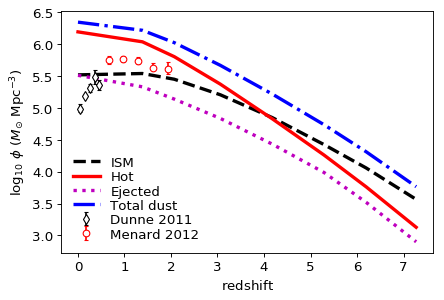

In [19]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure

Cold = np.zeros((len(redshift)))
Hot = np.zeros((len(redshift)))
Ejected = np.zeros((len(redshift)))
Total = np.zeros((len(redshift)))

for snap in range(len(redshift)):
    Cold[snap] = sum(G_history[snap].ColdDust) *1.0e10/Hubble_h / (BoxSize/Hubble_h)**3
    Hot[snap] = sum(G_history[snap].HotDust) *1.0e10/Hubble_h / (BoxSize/Hubble_h)**3
    Ejected[snap] = sum(G_history[snap].EjectedDust) *1.0e10/Hubble_h / (BoxSize/Hubble_h)**3
    Total[snap] = Cold[snap] + Hot[snap] + Ejected[snap]
z = np.array(redshift)

plt.plot(z, np.log10(Cold), 'k--', lw=3.0, label='ISM')
plt.plot(z, np.log10(Hot), 'r-', lw=3.0, label='Hot')
plt.plot(z, np.log10(Ejected), 'm:', lw=3.0, label='Ejected')
plt.plot(z, np.log10(Total), 'b-.', lw=3.0, label='Total dust')

#Dunne 2011
x = [0.052, 0.155, 0.251, 0.36, 0.45]
y = [4.986, 5.186, 5.316, 5.488, 5.353]
y_low = [0.054, 0, 0.062, 0.107, 0.074]
y_up = [0.072, 0, 0.064, 0.102, 0.088]
plt.errorbar(x, y, yerr=[y_low, y_up], fmt='kd', mfc='white', label='Dunne 2011')

#Menard 2012
x = [0.661, 0.976, 1.3, 1.618, 1.937]
y = [5.749, 5.767, 5.743, 5.631, 5.613]
y_low =[0.057, 0.04, 0.048, 0.029, 0.084]
y_up = [0.065, 0.051, 0.056, 0.081, 0.103]
plt.errorbar(x, y, yerr=[y_low, y_up], fmt='ro', mfc='white', label='Menard 2012')
plt.ylabel(r'$\log_{10}\ \phi\ (M_{\odot}\ \mathrm{Mpc}^{-3})$')  # Set the y...
plt.xlabel(r'$\mathrm{redshift}$')  # and the x-axis labels

# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

leg = plt.legend(loc='lower left', numpoints=1,
                         labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.savefig('plots/DustMassDensity_z-nodestruct.png')

## Dust Mass - Stellar Mass Evolution

In [ ]:
#plt.figure(figsize=(10,5))
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12,6))

for i in range(8):
    ax1 = plt.subplot(2,4,i+1)
    
    w = np.where((G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[i].ColdDust * 1.e10 / Hubble_h > 1.e4))[0]
    alldust = np.log10(G_history[i].ColdDust[w] * 1.e10 / Hubble_h)
    allmass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
    if(len(w) > dilute): w = sample(list(w), dilute)
    mass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
    dust = np.log10(G_history[i].ColdDust[w] * 1.e10 / Hubble_h)
    w = np.where((G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e10) & (G_history[i].ColdDust * 1.e10 / Hubble_h > 1.e4))[0]
    if(len(w) > 500): w = sample(list(w), 500)
    bigmass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
    bigdust = np.log10(G_history[i].ColdDust[w] * 1.e10 / Hubble_h)
    
    binwidth = 0.3
    total_bins = int((max(allmass) - min(allmass)) / binwidth)
    bins = np.linspace(allmass.min(), allmass.max(), total_bins)
    delta = bins[1]-bins[0]
    idx = np.digitize(allmass, bins)
    median = [np.percentile(alldust[idx==k+1], 50) for k in range(total_bins)]
    perc1 = [np.percentile(alldust[idx==k+1], 16) for k in range(total_bins)]
    perc2 = [np.percentile(alldust[idx==k+1], 84) for k in range(total_bins)]

    plt.scatter(mass, dust, marker='o', s=1, c='grey', alpha=0.3)
    plt.scatter(bigmass, bigdust, marker='o', s=1, c='grey', alpha=0.3)
    plt.plot(bins-delta/2, median, c='white', linewidth=1.2, label='z = '+ f'{redshift[i]:.3f}')
    plt.plot(bins-delta/2, median, 'k-', linewidth=1.2)
    plt.plot(bins-delta/2, perc1, 'k--', linewidth=1.2)
    plt.plot(bins-delta/2, perc2, 'k--', linewidth=1.2)
    
    plt.axis([7.8, 12.2, 3.5, 13.5])
    leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
    leg.draw_frame(False)  # Don't want a box frame
    for t in leg.get_texts():  # Reduce the size of the text
        t.set_fontsize('medium')


plt.subplot(241).set_xticklabels([])
plt.errorbar(np.log10(star_rr), np.log10(dust_rr), yerr=[np.log10((dust_rr - dusterr_rr) / dust_rr), np.log10((dusterr_rr + dust_rr) / dust_rr)], fmt='ko', markersize=3, mfc='white', label="RR+ 2014 (ac)")
plt.errorbar(np.log10(star_rr), np.log10(dust2_rr), yerr=[np.log10((dust2_rr - dusterr_rr) / dust2_rr), np.log10((dusterr_rr + dust2_rr) / dust2_rr)], fmt='k^', markersize=3, mfc='white', label="RR+ 2014 (gr)")


#Data from Santini et al. 2014
logmass = (10, 10, 10, 10.25, 10.25, 10.25, 10.5, 10.5, 10.5, 10.75, 11)
logdust = (7.11, 7.06, 6.95, 6.83, 7.05, 7.44, 7.42, 7.55, 7.64, 7.71, 7.31)
low_err = (0.15, 0.13, 0.19, 0.13, 0.08, 0.07, 0.43, 0.14, 0.06, 0.1, 0.23)
upp_err = (0.26, 0.31, 0.3, 0.13, 0.12, 0.05, 0.07, 0.3, 0.04, 0.05, 0.26)
plt.errorbar(logmass, logdust, yerr=np.array([low_err, upp_err]), fmt='rv', markersize=3, mfc='white', label='Santini+ 2014')

#Data from Dustpedia (Nersesian et al. 2019)
logmass = (10.92, 10.94, 10.35, 10.48, 10.46, 10.74, 10.65, 10.48, 10.55, 10.40, 10.28, 9.83, 9.62, 9.27, 9.24, 9.08)
xerr = (0.05, 0.05, 0.09, 0.07, 0.06, 0.04, 0.08, 0.08, 0.08, 0.10, 0.09, 0.11, 0.11, 0.11, 0.12, 0.14)
logdust = (6.15, 6.6, 5.95, 6.12, 6.46, 6.74, 7.00, 7.01, 7.23, 7.31, 7.29, 6.94, 6.81, 6.46, 6.25, 5.93)
yerr = (0.38, 0.27, 0.28, 0.22, 0.13, 0.16, 0.09, 0.07, 0.07, 0.06, 0.07, 0.09, 0.11, 0.14, 0.17, 0.25)
plt.errorbar(logmass, logdust, yerr=yerr, xerr=xerr, fmt='bs', markersize=3, mfc='white', label='Nersesian+ 2019')
leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.subplot(242).set_yticklabels([])
plt.subplot(242).set_xticklabels([])
x = [10.25, 10.25, 10.5, 10.5, 10.5, 10.5, 10.75, 10.75, 10.75, 10.75, 10.75, 10.75, 11, 11, 11, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 12, 12, 12]
y = [7.89, 7.64, 7.97, 7.93, 8.34, 8.61, 7.51, 8.01, 7.85, 8.02, 8.17, 8.39, 8.16, 8.03, 8.21, 7.85, 8.23, 8.44, 8.53, 8.76, 9.11, 8.31, 8.82, 8.89]
low_err = [0.4, 0.07, 0.28, 0.17, 0.22, 0.4, 0.18, 0.24, 0.04, 0.04, 0.06, 0.06, 0.38, 0.1, 0.1, 0.14, 0.09, 0.07, 0.09, 0.13, 0.17, 0.14, 0.13, 0.21]
upp_err = [0.52, 0.42, 0.27, 0.2, 0.23, 0.36, 0.69, 0.16, 0.17, 0.2, 0.18, 0.26, 0.39, 0.17, 0.13, 0.37, 0.21, 0.15, 0.17, 0.11, 0.1, 0.2, 0.18, 0.21]
plt.errorbar(x, y, yerr=np.array([low_err, upp_err]), fmt='rv', markersize=3, mfc='white', label="Santini 2014")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(243).set_yticklabels([])
plt.subplot(243).set_xticklabels([])
x = [10.5, 10.5, 10.75, 10.75, 10.75, 10.75, 11, 11, 11, 11, 11.5, 11.5, 11.5, 11.5, 12, 12, 12]
y = [7.92, 8.32, 7.85, 8.07, 8.34, 8.75, 7.94, 8.14, 8.37, 8.71, 8.1, 8.28, 8.6, 8.94, 8.46, 8.78, 9.18]
err = [[0.08, 0.05, 0.1, 0.11, 0.02, 0.04, 0.14, 0.07, 0.02, 0.04, 0.07, 0.01, 0.04, 0.03, 0.05, 0.16, 0.12], 
       [0.42, 0.27, 0.26, 0.13, 0.15, 0.21, 0.42, 0.2, 0.14, 0.16, 0.26, 0.12, 0.18, 0.14, 0.29, 0.2, 0.14]]
plt.errorbar(x, y, yerr=err, fmt='rv', markersize=3, mfc='white', label="Santini 2014")
x = [11.36, 11.37, 11.89, 10.4, 11.6, 10.65, 11.35, 11.31, 9.97, 10.15, 9.92, 10.07, 11.38, 10.63, 11.39, 9.64, 11.01, 10.92, 10.76]
xerr = [[0.24, 0.55, 1.29, 0.49, 0.26, 0.19, 0.52, 0.2, 0.21, 0.88, 0.13, 0.27, 0.84, 0.22, 0.35, 0.42, 0.31, 0.44, 0.33],
        [0.06, 0.01, 0.03, 0.17, 0.09, 0.09, 0.2, 0.09, 0.27, 0.04, 0.27, 0.35, 0.3, 0.0, 0.18, 0.13, 0.15, 0.17, 0.15]]
y = [9.16, 9.33, 8.99, 8.64, 8.85, 9.03, 9.06, 8.72, 9.05, 6.38, 9.0, 8.71, 8.87, 8.84, 8.71, 8.27, 9.28, 8.55, 8.53]
yerr = [[0.19, 0.2, 0.25, 0.56, 0.23, 0.13, 0.26, 0.3, 0.14, 0.38, 0.42, 0.27, 0.13, 0.0, 0.07, 1.87, 0.19, 0.18, 0.22],
        [0.12, 0.14, 0.15, 0.29, 0.25, 0.13, 0.26, 0.26, 0.15, 2.11, 0.12, 0.12, 0.19, 0.33, 0.19, 0.45, 0.2, 0.39, 0.37]]
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='ks', markersize=3, mfc='white', label="da Cunha 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.subplot(244).set_yticklabels([])
plt.subplot(244).set_xticklabels([])
x = [10.41, 10.72, 10.83, 11.46, 10.92, 10.96, 11.49, 10.43, 10.28, 10.53, 11.3, 9.86, 11.71, 10.58, 11.02, 11.43, 10.98, 10.75, 11.87, 11.0,  10.76, 10.41, 10.43]
xerr = [[0.88, 0.62, 0.01, 0.85, 0.28, 0.32, 0.39, 0.63, 0.62, 0.09, 0.3, 0.79, 0.26, 0.22, 0.36, 0.29, 0.46, 0.55, 0.21, 0.39, 0.33, 0.21, 0.77],
        [0.41, 0.01, 0.01, 0.1, 0.11, 0.13, 0.15, 0.17, 0.22, 0.73, 0.07, 0.51, 0.11, 0.12, 0.15, 0.11, 0.17, 0.19, 0.12, 0.09, 0.15, 0.1, 0.27]]
y = [8.39, 8.68, 9.17, 9.22, 9.39, 8.98, 9.39, 8.51, 8.47, 8.96, 8.49, 8.42, 8.93, 9.04, 8.28, 8.99, 8.36, 8.34, 8.72, 8.28, 8.53, 9.34, 8.45]
yerr = [[0.24, 0.18, 0.2, 0.24, 0.22, 0.15, 0.2, 1, 0.93, 0.16, 0.15, 2.42, 0.22, 0.12, 0.21, 0.36, 0.35, 0.54, 0.03, 0.21, 0.22, 0.26, 0.35],
        [0.44, 0.2, 0.02, 0.07, 0.19, 0.21, 0.18, 0.54, 0.47, 0.21, 0.25, 0.73, 0.22, 0.04, 0.21, 0.33, 0.54, 0.43, 0.32, 0.32, 0.37, 0.25, 0.41]]
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='ks', markersize=3, mfc='white', label="da Cunha 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(245)
x = [11, 11.37, 11.46, 11.23, 11.18, 11.48, 11.45, 11.24, 10.55, 10.97, 10.38, 11.01, 11.56, 10.64, 11.05, 10.55, 11.34, 10.92, 11.19]
xerr = [[0.51, 0.51, 0.14, 0.66, 0.54, 0.5, 0.51, 0.56, 0.27, 0.57, 0,52,  0.49, 0.3, 0.4, 0.51, 0.65, 0.56, 0.44, 0.5],
        [0.19, 0.16, 0.03, 0.21, 0.2, 0.15, 0.12, 0.20, 0.1, 0.19, 0.22, 0.2, 0.12, 0.14, 0.24, 0.16, 0.2, 0.17, 0.16]]
y = [8.64, 8.99, 9.08, 8.68, 8.9, 8.76, 8.98, 8.64, 8.34, 8.67, 8.64, 8.9, 8.66, 8.58, 8.71, 8.61, 8.82, 8.52, 8.6]
yerr = [[0.22, 0.2, 0.17, 0.12, 0.25, 0.14, 0.23, 0.12, 0.47, 0.34, 0.44, 0.25, 0.18, 0.4, 0.26, 0.95, 0.14, 0.17, 0.16],
        [0.35, 0.24, 0.24, 0.23, 0.35, 0.17, 0.37, 0.24, 0.52, 0.4, 0.52, 0.4, 0.28, 0.53, 0.35, 0.55, 0.3, 0.27, 0.3]]
plt.errorbar(x, y, yerr=yerr, fmt='ks', markersize=3, mfc='white', label="da Cunha 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(246).set_yticklabels([])
x = [10.97, 10.9, 11.75, 10.21, 10.42, 10.36, 10.64, 10.43, 10.21]
xerr = [[0.42, 0.39, 0.28, 0.55, 0.55, 0.55, 0.22, 0.54, 0.57],
        [0.15, 0.13, 0.09, 0.23, 0.22, 0.22, 0.05, 0.22, 0.22]]
y = [9.12, 8.69, 8.85, 8.4, 8.61, 8.55, 8.97, 8.63, 8.4]
yerr = [[0.46, 0.37, 0.13, 0.42, 0.42, 0.41, 0.32, 0.42, 0.42],
        [0.49, 0.61, 0.4, 0.55, 0.56, 0.56, 0.34, 0.56, 0.56]]
plt.errorbar(x, y, yerr=yerr, fmt='ks', markersize=3, mfc='white', label="da Cunha 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(247).set_yticklabels([])
x = [9.2, 9.7, 9.5, 9.7, 9.9, 9.3, 9.3, 9.8, 9.0]
y = [7.36, 8.28, 7.61, 7.43, 7.3, 7.02, 7.36, 7.38, 7.51]
xerr = 0.3
yerr = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2]
uplims = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=bool)
plt.errorbar(x, y, xerr=xerr, yerr=yerr, uplims=uplims, fmt='bs', markersize=3, mfc='white', label="Mancini 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(248).set_yticklabels([])
x = [9.2, 9.7, 9.5, 9.7, 9.9, 9.3, 9.3, 9.8, 9.0]
y = [7.36, 8.28, 7.61, 7.43, 7.3, 7.02, 7.36, 7.38, 7.51]
xerr = 0.3
yerr = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2]
uplims = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=bool)
plt.errorbar(x, y, xerr=xerr, yerr=yerr, uplims=uplims, fmt='bs', markersize=3, mfc='white', label="Mancini 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.5, 0.04, r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$', ha='center')
fig.text(0.07, 0.5, r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$', va='center', rotation='vertical')

#plt.savefig('plots/duststar_z-new-millennium.png')


/Users/dtriani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


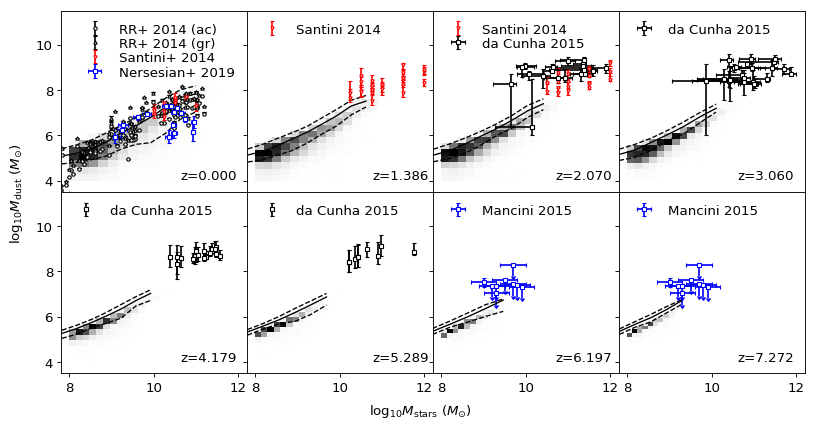

In [96]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12,6))

for i in range(8):
    ax1 = plt.subplot(2,4,i+1)
    
    w = np.where((G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[i].ColdDust * 1.e10 / Hubble_h > 1.e4))[0]
    dust = np.log10(G_history[i].ColdDust[w] * 1.e10 / Hubble_h)
    mass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
    
    binwidth = 0.3
    total_bins = int((max(mass) - min(mass)) / binwidth)
    bins = np.linspace(mass.min(), mass.max(), total_bins)
    delta = bins[1]-bins[0]
    idx = np.digitize(mass, bins)
    median = [np.percentile(dust[idx==k+1], 50) for k in range(total_bins) if len(dust[idx==k+1]) > 3]
    perc1 = [np.percentile(dust[idx==k+1], 16) for k in range(total_bins) if len(dust[idx==k+1]) > 3]
    perc2 = [np.percentile(dust[idx==k+1], 84) for k in range(total_bins) if len(dust[idx==k+1]) > 3]
    x = [(bins[k]-delta/2) for k in range(total_bins) if len(dust[idx==k+1]) > 3]
    
    #plt.scatter(mass, dust, marker='o', s=1, c='grey', alpha=0.3)
    plt.hist2d(mass, dust, bins=15, cmap=plt.cm.Greys)
    plt.plot(x, median, 'k-', linewidth=1.2)
    plt.plot(x, perc1, 'k--', linewidth=1.2)
    plt.plot(x, perc2, 'k--', linewidth=1.2)
    
    plt.axis([7.8, 12.2, 3.5, 11.5])
        
plt.subplot(241).set_xticklabels([])
plt.errorbar(np.log10(star_rr), np.log10(dust_rr), yerr=[np.log10((dust_rr - dusterr_rr) / dust_rr), np.log10((dusterr_rr + dust_rr) / dust_rr)], fmt='ko', markersize=3, mfc='white', label="RR+ 2014 (ac)")
plt.errorbar(np.log10(star_rr), np.log10(dust2_rr), yerr=[np.log10((dust2_rr - dusterr_rr) / dust2_rr), np.log10((dusterr_rr + dust2_rr) / dust2_rr)], fmt='k^', markersize=3, mfc='white', label="RR+ 2014 (gr)")


#Data from Santini et al. 2014
logmass = (10, 10, 10, 10.25, 10.25, 10.25, 10.5, 10.5, 10.5, 10.75, 11)
logdust = (7.11, 7.06, 6.95, 6.83, 7.05, 7.44, 7.42, 7.55, 7.64, 7.71, 7.31)
low_err = (0.15, 0.13, 0.19, 0.13, 0.08, 0.07, 0.43, 0.14, 0.06, 0.1, 0.23)
upp_err = (0.26, 0.31, 0.3, 0.13, 0.12, 0.05, 0.07, 0.3, 0.04, 0.05, 0.26)
plt.errorbar(logmass, logdust, yerr=np.array([low_err, upp_err]), fmt='rv', markersize=3, mfc='white', label='Santini+ 2014')

#Data from Dustpedia (Nersesian et al. 2019)
logmass = (10.92, 10.94, 10.35, 10.48, 10.46, 10.74, 10.65, 10.48, 10.55, 10.40, 10.28, 9.83, 9.62, 9.27, 9.24, 9.08)
xerr = (0.05, 0.05, 0.09, 0.07, 0.06, 0.04, 0.08, 0.08, 0.08, 0.10, 0.09, 0.11, 0.11, 0.11, 0.12, 0.14)
logdust = (6.15, 6.6, 5.95, 6.12, 6.46, 6.74, 7.00, 7.01, 7.23, 7.31, 7.29, 6.94, 6.81, 6.46, 6.25, 5.93)
yerr = (0.38, 0.27, 0.28, 0.22, 0.13, 0.16, 0.09, 0.07, 0.07, 0.06, 0.07, 0.09, 0.11, 0.14, 0.17, 0.25)
plt.errorbar(logmass, logdust, yerr=yerr, xerr=xerr, fmt='bs', markersize=3, mfc='white', label='Nersesian+ 2019')
leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.subplot(242).set_yticklabels([])
plt.subplot(242).set_xticklabels([])
x = [10.25, 10.25, 10.5, 10.5, 10.5, 10.5, 10.75, 10.75, 10.75, 10.75, 10.75, 10.75, 11, 11, 11, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 12, 12, 12]
y = [7.89, 7.64, 7.97, 7.93, 8.34, 8.61, 7.51, 8.01, 7.85, 8.02, 8.17, 8.39, 8.16, 8.03, 8.21, 7.85, 8.23, 8.44, 8.53, 8.76, 9.11, 8.31, 8.82, 8.89]
low_err = [0.4, 0.07, 0.28, 0.17, 0.22, 0.4, 0.18, 0.24, 0.04, 0.04, 0.06, 0.06, 0.38, 0.1, 0.1, 0.14, 0.09, 0.07, 0.09, 0.13, 0.17, 0.14, 0.13, 0.21]
upp_err = [0.52, 0.42, 0.27, 0.2, 0.23, 0.36, 0.69, 0.16, 0.17, 0.2, 0.18, 0.26, 0.39, 0.17, 0.13, 0.37, 0.21, 0.15, 0.17, 0.11, 0.1, 0.2, 0.18, 0.21]
plt.errorbar(x, y, yerr=np.array([low_err, upp_err]), fmt='rv', markersize=3, mfc='white', label="Santini 2014")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(243).set_yticklabels([])
plt.subplot(243).set_xticklabels([])
x = [10.5, 10.5, 10.75, 10.75, 10.75, 10.75, 11, 11, 11, 11, 11.5, 11.5, 11.5, 11.5, 12, 12, 12]
y = [7.92, 8.32, 7.85, 8.07, 8.34, 8.75, 7.94, 8.14, 8.37, 8.71, 8.1, 8.28, 8.6, 8.94, 8.46, 8.78, 9.18]
err = [[0.08, 0.05, 0.1, 0.11, 0.02, 0.04, 0.14, 0.07, 0.02, 0.04, 0.07, 0.01, 0.04, 0.03, 0.05, 0.16, 0.12], 
       [0.42, 0.27, 0.26, 0.13, 0.15, 0.21, 0.42, 0.2, 0.14, 0.16, 0.26, 0.12, 0.18, 0.14, 0.29, 0.2, 0.14]]
plt.errorbar(x, y, yerr=err, fmt='rv', markersize=3, mfc='white', label="Santini 2014")
x = [11.36, 11.37, 11.89, 10.4, 11.6, 10.65, 11.35, 11.31, 9.97, 10.15, 9.92, 10.07, 11.38, 10.63, 11.39, 9.64, 11.01, 10.92, 10.76]
xerr = [[0.24, 0.55, 1.29, 0.49, 0.26, 0.19, 0.52, 0.2, 0.21, 0.88, 0.13, 0.27, 0.84, 0.22, 0.35, 0.42, 0.31, 0.44, 0.33],
        [0.06, 0.01, 0.03, 0.17, 0.09, 0.09, 0.2, 0.09, 0.27, 0.04, 0.27, 0.35, 0.3, 0.0, 0.18, 0.13, 0.15, 0.17, 0.15]]
y = [9.16, 9.33, 8.99, 8.64, 8.85, 9.03, 9.06, 8.72, 9.05, 6.38, 9.0, 8.71, 8.87, 8.84, 8.71, 8.27, 9.28, 8.55, 8.53]
yerr = [[0.19, 0.2, 0.25, 0.56, 0.23, 0.13, 0.26, 0.3, 0.14, 0.38, 0.42, 0.27, 0.13, 0.0, 0.07, 1.87, 0.19, 0.18, 0.22],
        [0.12, 0.14, 0.15, 0.29, 0.25, 0.13, 0.26, 0.26, 0.15, 2.11, 0.12, 0.12, 0.19, 0.33, 0.19, 0.45, 0.2, 0.39, 0.37]]
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='ks', markersize=3, mfc='white', label="da Cunha 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.subplot(244).set_yticklabels([])
plt.subplot(244).set_xticklabels([])
x = [10.41, 10.72, 10.83, 11.46, 10.92, 10.96, 11.49, 10.43, 10.28, 10.53, 11.3, 9.86, 11.71, 10.58, 11.02, 11.43, 10.98, 10.75, 11.87, 11.0,  10.76, 10.41, 10.43]
xerr = [[0.88, 0.62, 0.01, 0.85, 0.28, 0.32, 0.39, 0.63, 0.62, 0.09, 0.3, 0.79, 0.26, 0.22, 0.36, 0.29, 0.46, 0.55, 0.21, 0.39, 0.33, 0.21, 0.77],
        [0.41, 0.01, 0.01, 0.1, 0.11, 0.13, 0.15, 0.17, 0.22, 0.73, 0.07, 0.51, 0.11, 0.12, 0.15, 0.11, 0.17, 0.19, 0.12, 0.09, 0.15, 0.1, 0.27]]
y = [8.39, 8.68, 9.17, 9.22, 9.39, 8.98, 9.39, 8.51, 8.47, 8.96, 8.49, 8.42, 8.93, 9.04, 8.28, 8.99, 8.36, 8.34, 8.72, 8.28, 8.53, 9.34, 8.45]
yerr = [[0.24, 0.18, 0.2, 0.24, 0.22, 0.15, 0.2, 1, 0.93, 0.16, 0.15, 2.42, 0.22, 0.12, 0.21, 0.36, 0.35, 0.54, 0.03, 0.21, 0.22, 0.26, 0.35],
        [0.44, 0.2, 0.02, 0.07, 0.19, 0.21, 0.18, 0.54, 0.47, 0.21, 0.25, 0.73, 0.22, 0.04, 0.21, 0.33, 0.54, 0.43, 0.32, 0.32, 0.37, 0.25, 0.41]]
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='ks', markersize=3, mfc='white', label="da Cunha 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(245)
x = [11, 11.37, 11.46, 11.23, 11.18, 11.48, 11.45, 11.24, 10.55, 10.97, 10.38, 11.01, 11.56, 10.64, 11.05, 10.55, 11.34, 10.92, 11.19]
xerr = [[0.51, 0.51, 0.14, 0.66, 0.54, 0.5, 0.51, 0.56, 0.27, 0.57, 0,52,  0.49, 0.3, 0.4, 0.51, 0.65, 0.56, 0.44, 0.5],
        [0.19, 0.16, 0.03, 0.21, 0.2, 0.15, 0.12, 0.20, 0.1, 0.19, 0.22, 0.2, 0.12, 0.14, 0.24, 0.16, 0.2, 0.17, 0.16]]
y = [8.64, 8.99, 9.08, 8.68, 8.9, 8.76, 8.98, 8.64, 8.34, 8.67, 8.64, 8.9, 8.66, 8.58, 8.71, 8.61, 8.82, 8.52, 8.6]
yerr = [[0.22, 0.2, 0.17, 0.12, 0.25, 0.14, 0.23, 0.12, 0.47, 0.34, 0.44, 0.25, 0.18, 0.4, 0.26, 0.95, 0.14, 0.17, 0.16],
        [0.35, 0.24, 0.24, 0.23, 0.35, 0.17, 0.37, 0.24, 0.52, 0.4, 0.52, 0.4, 0.28, 0.53, 0.35, 0.55, 0.3, 0.27, 0.3]]
plt.errorbar(x, y, yerr=yerr, fmt='ks', markersize=3, mfc='white', label="da Cunha 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(246).set_yticklabels([])
x = [10.97, 10.9, 11.75, 10.21, 10.42, 10.36, 10.64, 10.43, 10.21]
xerr = [[0.42, 0.39, 0.28, 0.55, 0.55, 0.55, 0.22, 0.54, 0.57],
        [0.15, 0.13, 0.09, 0.23, 0.22, 0.22, 0.05, 0.22, 0.22]]
y = [9.12, 8.69, 8.85, 8.4, 8.61, 8.55, 8.97, 8.63, 8.4]
yerr = [[0.46, 0.37, 0.13, 0.42, 0.42, 0.41, 0.32, 0.42, 0.42],
        [0.49, 0.61, 0.4, 0.55, 0.56, 0.56, 0.34, 0.56, 0.56]]
plt.errorbar(x, y, yerr=yerr, fmt='ks', markersize=3, mfc='white', label="da Cunha 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(247).set_yticklabels([])
x = [9.2, 9.7, 9.5, 9.7, 9.9, 9.3, 9.3, 9.8, 9.0]
y = [7.36, 8.28, 7.61, 7.43, 7.3, 7.02, 7.36, 7.38, 7.51]
xerr = 0.3
yerr = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2]
uplims = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=bool)
plt.errorbar(x, y, xerr=xerr, yerr=yerr, uplims=uplims, fmt='bs', markersize=3, mfc='white', label="Mancini 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(248).set_yticklabels([])
x = [9.2, 9.7, 9.5, 9.7, 9.9, 9.3, 9.3, 9.8, 9.0]
y = [7.36, 8.28, 7.61, 7.43, 7.3, 7.02, 7.36, 7.38, 7.51]
xerr = 0.3
yerr = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2]
uplims = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=bool)
plt.errorbar(x, y, xerr=xerr, yerr=yerr, uplims=uplims, fmt='bs', markersize=3, mfc='white', label="Mancini 2015")
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.5, 0.04, r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$', ha='center')
fig.text(0.07, 0.5, r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$', va='center', rotation='vertical')
fig.text(0.25,0.53, 'z=0.000')
fig.text(0.45,0.53, 'z=1.386')
fig.text(0.64,0.53, 'z=2.070')
fig.text(0.83,0.53, 'z=3.060')
fig.text(0.25,0.15, 'z=4.179')
fig.text(0.45,0.15, 'z=5.289')
fig.text(0.64,0.15, 'z=6.197')
fig.text(0.83,0.15, 'z=7.272')
plt.savefig('plots/duststar_z-play.png')

## DTG - Z Evolution

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/Users/dtriani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

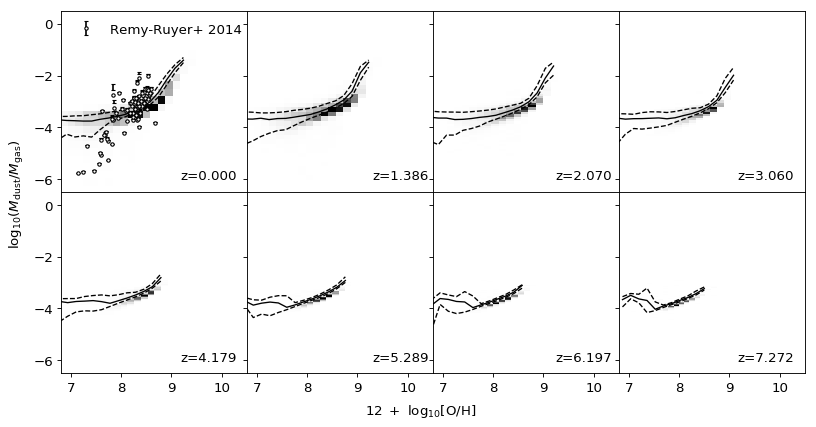

In [97]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12,6))

for i in range(8):
    ax1 = plt.subplot(2,4,i+1)
    
    metallicity= np.log10((G_history[i].MetalsColdGas / G_history[i].ColdGas) / 0.02) + 9
    w = np.where((G_history[i].ColdDust > 0.0) & (metallicity < 9.49) & (metallicity > 6.5) & (G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e8))[0]
    DTG = np.log10(G_history[i].ColdDust[w] /G_history[i].ColdGas[w])
    Z= np.log10((G_history[i].MetalsColdGas[w] / G_history[i].ColdGas[w]) / 0.02) + 9

    binwidth = 0.15
    total_bins = int((max(Z) - min(Z)) / binwidth)
    bins = np.linspace(min(Z), max(Z), total_bins)
    delta = bins[1]-bins[0]
    idx = np.digitize(Z, bins)
    '''
    if(len(w) > dilute): w = sample(list(w), dilute)
    Z = np.log10((G_history[i].MetalsColdGas[w] / G_history[i].ColdGas[w]) / 0.02) + 9
    DTG = np.log10(G_history[i].ColdDust[w]/G_history[i].ColdGas[w]) 
    plt.scatter(Z, DTG, marker='o', s=1, c='grey', alpha=0.2)
    '''
    
    median = [np.percentile(DTG[idx==k+1], 50) for k in range(total_bins) if len(DTG[idx==k+1]) > 4]
    perc1 = [np.percentile(DTG[idx==k+1], 16) for k in range(total_bins) if len(DTG[idx==k+1]) > 4]
    perc2 = [np.percentile(DTG[idx==k+1], 84) for k in range(total_bins) if len(DTG[idx==k+1]) > 4]
    x = [(bins[k]-delta/2) for k in range(total_bins) if len(DTG[idx==k+1]) > 4]
    
    plt.plot(x, median, 'k-', linewidth=1.2)
    plt.plot(x, perc1, 'k--', linewidth=1.2)
    plt.plot(x, perc2, 'k--', linewidth=1.2)
    plt.hist2d(Z, DTG, bins=(20, 100), cmap=plt.cm.Greys)


    plt.axis([6.8, 10.5, -6.5, 0.5])
        
plt.subplot(241).set_xticklabels([])
plt.errorbar(Z_rr, DTG_rr, yerr=[DTGerr_low, DTGerr_up], fmt='k.', mfc='white', label='Remy-Ruyer+ 2014')
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(242).set_xticklabels([])
plt.subplot(242).set_yticklabels([])
plt.subplot(243).set_xticklabels([])
plt.subplot(243).set_yticklabels([])
plt.subplot(244).set_xticklabels([])
plt.subplot(244).set_yticklabels([])
plt.subplot(246).set_yticklabels([])
plt.subplot(247).set_yticklabels([])
plt.subplot(248).set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.5, 0.04, r'$12\ +\ \log_{10}[\mathrm{O/H}]$', ha='center')
fig.text(0.07, 0.5, r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{gas}})$', va='center', rotation='vertical')
fig.text(0.25,0.53, 'z=0.000')
fig.text(0.45,0.53, 'z=1.386')
fig.text(0.64,0.53, 'z=2.070')
fig.text(0.83,0.53, 'z=3.060')
fig.text(0.25,0.15, 'z=4.179')
fig.text(0.45,0.15, 'z=5.289')
fig.text(0.64,0.15, 'z=6.197')
fig.text(0.83,0.15, 'z=7.272')
plt.savefig('plots/DTG-Z_z-play.png')


## DTG - Mass Evolution

/Users/dtriani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


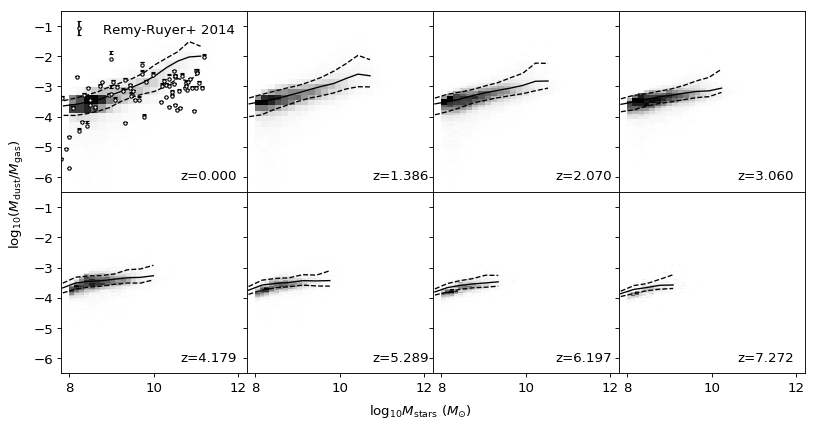

In [98]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12,6))

for i in range(8):
    ax1 = plt.subplot(2,4,i+1)
    
    w = np.where((G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[i].MetalsColdGas > 0) & (G_history[i].ColdDust > 0))[0]
    mass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
    DTG = np.log10(G_history[i].ColdDust[w]/G_history[i].ColdGas[w])

    binwidth = 0.25
    total_bins = int((max(mass) - min(mass)) / binwidth)
    bins = np.linspace(mass.min(), mass.max(), total_bins)
    delta = bins[1]-bins[0]
    idx = np.digitize(mass, bins)
    
    median = [np.percentile(DTG[idx==k+1], 50) for k in range(total_bins) if len(DTG[idx==k+1]) > 3]
    perc1 = [np.percentile(DTG[idx==k+1], 16) for k in range(total_bins) if len(DTG[idx==k+1]) > 3]
    perc2 = [np.percentile(DTG[idx==k+1], 84) for k in range(total_bins) if len(DTG[idx==k+1]) > 3]
    x = [(bins[k]-delta/2) for k in range(total_bins) if len(DTG[idx==k+1]) > 3]
    
    plt.plot(x, median, 'k-', linewidth=1.2)
    plt.plot(x, perc1, 'k--', linewidth=1.2)
    plt.plot(x, perc2, 'k--', linewidth=1.2)
    '''
    if(len(w) > dilute): w = sample(list(w), dilute)
    mass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
    DTG = np.log10(G_history[i].ColdDust[w]/G_history[i].ColdGas[w])
    '''
#    plt.scatter(mass, DTG, marker='o', s=1, c='grey', alpha=0.3)
    plt.hist2d(mass, DTG, bins=(20, 100), cmap=plt.cm.Greys)
    plt.axis([7.8, 12.2, -6.5, -0.5])
        
plt.subplot(241).set_xticklabels([])

plt.errorbar(logstar_rr, DTG_rr, yerr=[DTGerr_low, DTGerr_up], fmt='k.', mfc='white', label='Remy-Ruyer+ 2014')
leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
plt.subplot(242).set_xticklabels([])
plt.subplot(242).set_yticklabels([])
plt.subplot(243).set_xticklabels([])
plt.subplot(243).set_yticklabels([])
plt.subplot(244).set_xticklabels([])
plt.subplot(244).set_yticklabels([])
plt.subplot(246).set_yticklabels([])
plt.subplot(247).set_yticklabels([])
plt.subplot(248).set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)

fig.text(0.5, 0.04, r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$', ha='center')
fig.text(0.07, 0.5, r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{gas}})$', va='center', rotation='vertical')
fig.text(0.25,0.53, 'z=0.000')
fig.text(0.45,0.53, 'z=1.386')
fig.text(0.64,0.53, 'z=2.070')
fig.text(0.83,0.53, 'z=3.060')
fig.text(0.25,0.15, 'z=4.179')
fig.text(0.45,0.15, 'z=5.289')
fig.text(0.64,0.15, 'z=6.197')
fig.text(0.83,0.15, 'z=7.272')
plt.savefig('plots/DTG-mass_z-play.png')


## DTM - Z evolution

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/Users/dtriani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be

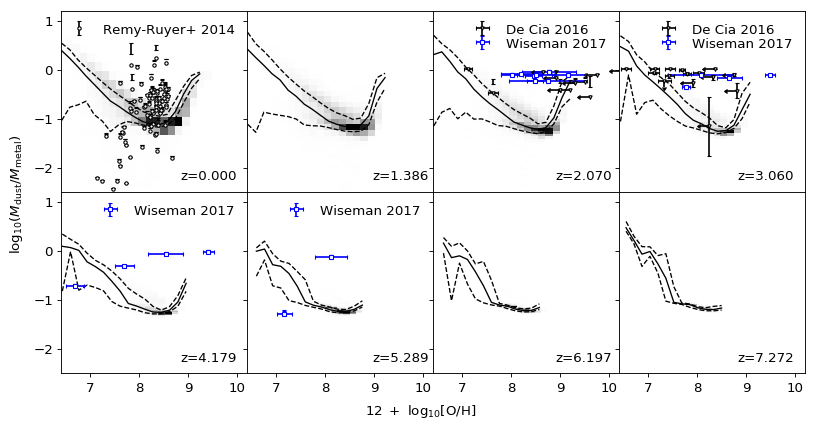

In [99]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12,6))

for i in range(8):
    ax1 = plt.subplot(2,4,i+1)
    
    metallicity= np.log10((G_history[i].MetalsColdGas / G_history[i].ColdGas) / 0.02) + 9
    w = np.where((G_history[i].ColdDust > 0.0) & (metallicity < 9.49) & (metallicity > 6.5) & (G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e8))[0]
    Z = np.log10((G_history[i].MetalsColdGas[w] / G_history[i].ColdGas[w]) / 0.02) + 9.0
    DTM = np.log10(G_history[i].ColdDust[w]/G_history[i].MetalsColdGas[w])

    binwidth = 0.15
    total_bins = int((max(Z) - min(Z)) / binwidth)
    bins = np.linspace(Z.min(), Z.max(), total_bins)
    delta = bins[1]-bins[0]
    idx = np.digitize(Z, bins)
    median = [np.percentile(DTM[idx==k+1], 50) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
    perc1 = [np.percentile(DTM[idx==k+1], 16) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
    perc2 = [np.percentile(DTM[idx==k+1], 84) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
    x = [(bins[k]-delta/2) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]

    plt.plot(x, median, 'k-', linewidth=1.2)
    plt.plot(x, perc1, 'k--', linewidth=1.2)
    plt.plot(x, perc2, 'k--', linewidth=1.2)
    
    '''
    if(len(w) > dilute): w = sample(list(w), dilute)
    Z = np.log10((G_history[i].MetalsColdGas[w] / G_history[i].ColdGas[w]) / 0.02) + 9.0
    DTM = np.log10(G_history[i].ColdDust[w]/G_history[i].MetalsColdGas[w])
    '''
    #plt.scatter(Z, DTM, marker='o', s=1, c='grey', alpha=0.3)
    #plt.scatter(Z, DTM, marker='o', s=1, c='k', alpha=0.5, label='SAGE with dust')
    plt.hist2d(Z, DTM, bins=(20, 150), cmap=plt.cm.Greys)
    plt.axis([6.4, 10.2, -2.5, 1.2])

    plt.subplot(241).set_xticklabels([])
plt.errorbar(Z_rr, DTM_rr, yerr=[DTMerr_low, DTMerr_up], fmt='k.', mfc='white', label='Remy-Ruyer+ 2014')
leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(242).set_xticklabels([])
plt.subplot(242).set_yticklabels([])

plt.subplot(243).set_xticklabels([])
plt.subplot(243).set_yticklabels([])
#De Cia+ 16
oh = np.array([1.26, 0.21, 0.31, -0.01, -1.37, -0.09, -0.34, 0.61, -1.88,0.76, 0.5, 1.61]) + 9
oh_err = np.array([0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.2, 0.08, 0.2, 0.2, 0.2])
oh_uplim = np.array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,  1])
dtm = np.array([0.92, 0.39, 0.54, 0.38, 0.34, 0.68, 0.89, 0.27, 1.01, 0.76, 0.56, 1.43])
dtm_err = np.array([0.03, 0.14, 0.11, 0.15, 0.16, 0.2, 0.03, 0.17, 0.01, 0.06, 0.11, 0.2])
dtm_uplim = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
y = np.log10(dtm)
uppy = np.log10((dtm + dtm_err) / dtm)
lowy = np.log10((dtm - dtm_err) / dtm)
plt.errorbar(oh, y, xerr=oh_err, yerr=[lowy, uppy], xuplims=oh_uplim, uplims=dtm_uplim, fmt='kv', markersize=3, mfc='white', label="De Cia 2016")
#Wiseman+ 17
Z = np.array([0.17, -0.24, -0.51, -0.79, -0.23, -0.98, -0.54, -0.5]) + 9
Z_err = [0.34, 0.8, 0.17, 0.42, 0.55, 0.22, 0.18, 0.38]
dtm = np.array([0.76, 0.59, 0.59, 0.8, 0.88, 0.78, 0.73, 0.79])
dtm_err = np.array([0.07, 0.06, 0.06, 0.06, 0.08, 0.06,  0.05, 0.07])
y = np.log10(dtm)
uppy = np.log10((dtm + dtm_err) / dtm)
lowy = np.log10((dtm - dtm_err) / dtm)
plt.errorbar(Z, y, xerr=Z_err, yerr=[lowy, uppy], fmt='bs', markersize=3, mfc='white', label="Wiseman 2017")
leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(244).set_xticklabels([])
plt.subplot(244).set_yticklabels([])
#De Cia+ 16
oh = np.array([-1.67, -1.55, -0.97, -0.18, -0.67, -2.46, -0.24, -1.09, -1.87, -1.89, -1.21, -0.63, -1.57, -0.75, -1.31]) + 9
oh_err = [0.13, 0.10, 0.12, 0.2, 0.2, 0.10, 0.2, 0.2, 0.09, 0.11, 0.08, 0.2, 0.09, 0.2, 0.07]
oh_uplim = [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, ]
dtm = np.array([0.59, 1.03, 0.87, 0.37, 0.69, 1.02,  0.78, 0.54, 1.02, 0.84, 0.83, 1.03, 0.73, 0.07, 0.97])
dtm_err = np.array([0.2, 0.00, 0.04, 0.15, 0.08, 0.00, 0.06, 0.11, 0.00, 0.04, 0.05, 0.00, 0.07, 0.21, 0.02])
dtm_uplim = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y = np.log10(dtm)
uppy = np.log10((dtm + dtm_err) / dtm)
lowy = np.log10((dtm + dtm_err) / dtm)
plt.errorbar(oh, y, xerr=oh_err, yerr=[lowy, uppy], xuplims=oh_uplim, uplims=dtm_uplim, fmt='kv', markersize=3, mfc='white', label="De Cia 2016")
#Wiseman+ 17
Z = np.array([-0.92, 0.49, -0.34, -1.23]) + 9
Z_err = [0.68, 0.1, 0.25, 0.08]
dtm = np.array([0.76, 0.76, 0.68, 0.44])
dtm_err = np.array([0.09, 0.06, 0.05, 0.03])
y = np.log10(dtm)
uppy = np.log10((dtm + dtm_err) / dtm)
lowy = np.log10((dtm - dtm_err) / dtm)
plt.errorbar(Z, y, xerr=Z_err, yerr=[lowy, uppy], fmt='bs', markersize=3, mfc='white', label="Wiseman 2017")
leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.subplot(245)
Z = np.array([-2.31, 0.41, -0.46, -1.3]) + 9
Z_err = [0.18, 0.11, 0.36, 0.19]
dtm = np.array([0.19, 0.95, 0.85, 0.48])
dtm_err = np.array([0.02, 0.07, 0.07, 0.04])
y = np.log10(dtm)
uppy = np.log10((dtm + dtm_err) / dtm)
lowy = np.log10((dtm - dtm_err) / dtm)
plt.errorbar(Z, y, xerr=Z_err, yerr=[lowy, uppy], fmt='bs', markersize=3, mfc='white', label="Wiseman 2017")
leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(246).set_yticklabels([])
Z = np.array([-0.88, -1.83]) + 9
Z_err = [0.33, 0.16]
dtm = np.array([0.74, 0.05])
dtm_err = np.array([0.07, 0.01])
y = np.log10(dtm)
uppy = np.log10((dtm + dtm_err) / dtm)
lowy = np.log10((dtm - dtm_err) / dtm)
plt.errorbar(Z, y, xerr=Z_err, yerr=[lowy, uppy], fmt='bs', markersize=3, mfc='white', label="Wiseman 2017")
leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(247).set_yticklabels([])
plt.subplot(248).set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.5, 0.04, r'$12\ +\ \log_{10}[\mathrm{O/H}]$', ha='center')
fig.text(0.07, 0.5, r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{metal}})$', va='center', rotation='vertical')
fig.text(0.25,0.53, 'z=0.000')
fig.text(0.45,0.53, 'z=1.386')
fig.text(0.64,0.53, 'z=2.070')
fig.text(0.83,0.53, 'z=3.060')
fig.text(0.25,0.15, 'z=4.179')
fig.text(0.45,0.15, 'z=5.289')
fig.text(0.64,0.15, 'z=6.197')
fig.text(0.83,0.15, 'z=7.272')
plt.savefig('plots/DTM-Z_z-play.png')

## DTM - Mass evolution

/Users/dtriani/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


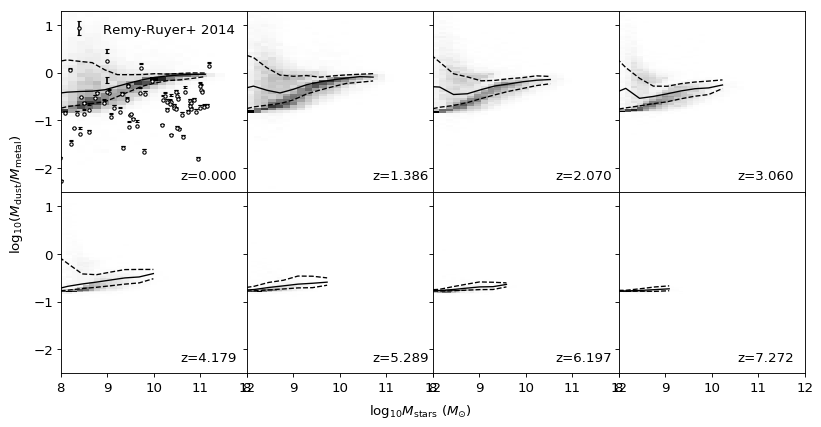

In [88]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12,6))

for i in range(8):
    ax1 = plt.subplot(2,4,i+1)
    w = np.where((G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[i].MetalsColdGas > 0) & (G_history[i].ColdDust > 0))[0]
    mass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
    DTM = np.log10(G_history[i].ColdDust[w]/G_history[i].MetalsColdGas[w])

    binwidth = 0.25
    total_bins = int((max(mass) - min(mass)) / binwidth)
    bins = np.linspace(mass.min(), mass.max(), total_bins)
    delta = bins[1]-bins[0]
    idx = np.digitize(mass, bins)
    median = [np.percentile(DTM[idx==k+1], 50) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
    perc1 = [np.percentile(DTM[idx==k+1], 16) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
    perc2 = [np.percentile(DTM[idx==k+1], 84) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
    x = [(bins[k]-delta/2) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]

    plt.plot(x, median, 'k-', linewidth=1.2)
    plt.plot(x, perc1, 'k--', linewidth=1.2)
    plt.plot(x, perc2, 'k--', linewidth=1.2)

    '''
    if(len(w) > dilute): w = sample(list(w), dilute)
    mass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
    DTM = np.log10(G_history[i].ColdDust[w]/G_history[i].MetalsColdGas[w])
    '''
#    plt.scatter(mass, DTM, marker='o', s=1, c='grey', alpha=0.3)
    plt.hist2d(mass, DTM, (20, 150), cmap=plt.cm.Greys)
    plt.axis([8, 12, -2.5, 1.3])
        
plt.subplot(241).set_xticklabels([])
plt.errorbar(logstar_rr, DTM_rr, yerr=[DTMerr_low, DTMerr_up], fmt='k.', mfc='white', label='Remy-Ruyer+ 2014')
leg = plt.legend(loc='upper right', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(242).set_xticklabels([])
plt.subplot(242).set_yticklabels([])
plt.subplot(243).set_xticklabels([])
plt.subplot(243).set_yticklabels([])
plt.subplot(244).set_xticklabels([])
plt.subplot(244).set_yticklabels([])
plt.subplot(246).set_yticklabels([])
plt.subplot(247).set_yticklabels([])
plt.subplot(248).set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.5, 0.04, r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$', ha='center')
fig.text(0.07, 0.5, r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{metal}})$', va='center', rotation='vertical')
fig.text(0.25,0.53, 'z=0.000')
fig.text(0.45,0.53, 'z=1.386')
fig.text(0.64,0.53, 'z=2.070')
fig.text(0.83,0.53, 'z=3.060')
fig.text(0.25,0.15, 'z=4.179')
fig.text(0.45,0.15, 'z=5.289')
fig.text(0.64,0.15, 'z=6.197')
fig.text(0.83,0.15, 'z=7.272')
plt.savefig('plots/DTM-Mass_z-play.png')


## DTG, DTM, rate vs M

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4392: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


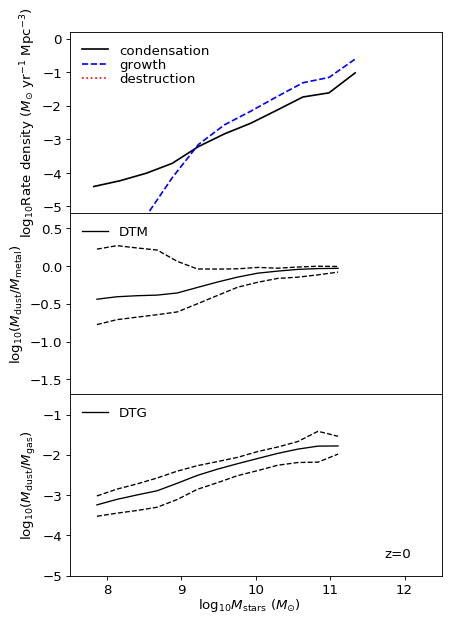

In [87]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(6,9))

plt.subplot(311).set_xticklabels([])
w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[0].ColdDust > 0))[0]
if(len(w) > 150000): w = sample(list(w), 150000)

mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
form = np.log10(G_history[0].dustdotform[w])  
growth = np.log10(G_history[0].dustdotgrowth[w])
destruct = np.log10(G_history[0].dustdotdestruct[w])

binwidth = 0.3
total_bins = int((max(mass) - min(mass)) / binwidth)

bins = np.linspace(mass.min(), mass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(mass, bins)
medianf = [np.percentile(form[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
mediang = [np.percentile(growth[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
mediand = [np.percentile(destruct[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
plt.plot(bins-delta/2, medianf, 'k-', label='condensation')
plt.plot(bins-delta/2, mediang, 'b--', label='growth')
plt.plot(bins-delta/2, mediand, 'r:', label='destruction')
plt.ylabel(r'$\log_{10} \mathrm{Rate\ density}\ (M_{\odot}\ \mathrm{yr}^{-1}\ \mathrm{Mpc}^{-3})$')  # Set the y...

plt.axis([7.5, 12.5, -5.2, 0.2])
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(312).set_xticklabels([])
w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[0].MetalsColdGas > 0) & (G_history[0].ColdDust > 0))[0]
if(len(w) > 150000): w = sample(list(w), 150000)
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
DTM = np.log10(G_history[0].ColdDust[w]/G_history[0].MetalsColdGas[w])

binwidth = 0.25
total_bins = int((max(mass) - min(mass)) / binwidth)
bins = np.linspace(mass.min(), mass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(mass, bins)

median = [np.percentile(DTM[idx==k+1], 50) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
perc1 = [np.percentile(DTM[idx==k+1], 16) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
perc2 = [np.percentile(DTM[idx==k+1], 84) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
x = [(bins[k]-delta/2) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]

plt.plot(x, median, 'k-', linewidth=1.2, label='DTM')
plt.plot(x, perc1, 'k--', linewidth=1.2)
plt.plot(x, perc2, 'k--', linewidth=1.2)

plt.ylabel( r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{metal}})$')
plt.axis([7.5, 12.5, -1.7, 0.7])
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(313)
w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[0].MetalsColdGas > 0) & (G_history[0].ColdDust > 0))[0]
if(len(w) > 150000): w = sample(list(w), 150000)
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
DTG = np.log10(G_history[0].ColdDust[w]/G_history[0].ColdGas[w])

binwidth = 0.25
total_bins = int((max(mass) - min(mass)) / binwidth)
bins = np.linspace(mass.min(), mass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(mass, bins)

median = [np.percentile(DTG[idx==k+1], 50) for k in range(total_bins) if len(DTG[idx==k+1]) > 3]
perc1 = [np.percentile(DTG[idx==k+1], 16) for k in range(total_bins) if len(DTG[idx==k+1]) > 3]
perc2 = [np.percentile(DTG[idx==k+1], 84) for k in range(total_bins) if len(DTG[idx==k+1]) > 3]
x = [(bins[k]-delta/2) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]

plt.plot(x, median, 'k-', linewidth=1.2, label='DTG')
plt.plot(x, perc1, 'k--', linewidth=1.2)
plt.plot(x, perc2, 'k--', linewidth=1.2)



plt.axis([7.5, 12.5, -5, -0.5])
plt.ylabel(r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{gas}})$')
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplots_adjust(wspace=0, hspace=0)

fig.text(0.5, 0.08, r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$', ha='center')
fig.text(0.78, 0.15, 'z=0')
plt.savefig('plots/all-vs-mass_nodestruct.png')

## All vs Z

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.

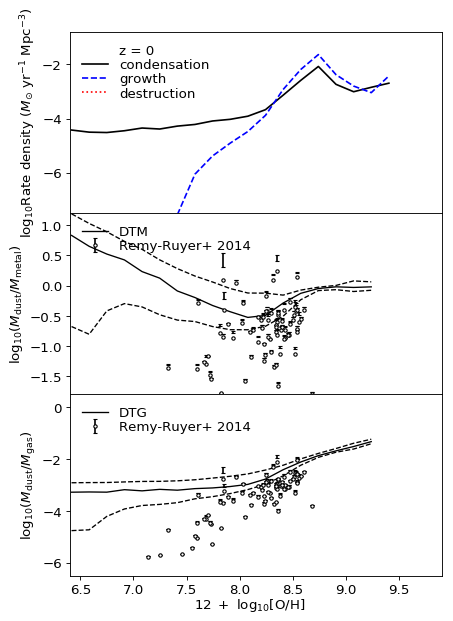

In [86]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(6,9))

plt.subplot(311).set_xticklabels([])
metallicity= np.log10((G_history[0].MetalsColdGas / G_history[0].ColdGas) / 0.02) + 9
w = np.where((G_history[0].ColdDust > 0.0) & (metallicity < 9.49) & (metallicity > 6.5) & (G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8))[0]
Z = np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9.0
form = np.log10(G_history[0].dustdotform[w])  
growth = np.log10(G_history[0].dustdotgrowth[w])
destruct = np.log10(G_history[0].dustdotdestruct[w])

binwidth = 0.15
total_bins = int((max(Z) - min(Z)) / binwidth)
bins = np.linspace(Z.min(), Z.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(Z, bins)
medianf = [np.percentile(form[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
mediang = [np.percentile(growth[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
mediand = [np.percentile(destruct[idx==k+1], 50, interpolation='linear') for k in range(total_bins)]
plt.plot(bins-delta/2, medianf, 'white', label='z = 0 ')
plt.plot(bins-delta/2, medianf, 'k-', label='condensation')
plt.plot(bins-delta/2, mediang, 'b--', label='growth')
plt.plot(bins-delta/2, mediand, 'r:', label='destruction')
plt.ylabel(r'$\log_{10} \mathrm{Rate\ density}\ (M_{\odot}\ \mathrm{yr}^{-1}\ \mathrm{Mpc}^{-3})$')  # Set the y...

plt.axis([6.4, 9.9, -7.5, -0.8])
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(312).set_xticklabels([])
metallicity= np.log10((G_history[0].MetalsColdGas / G_history[0].ColdGas) / 0.02) + 9
w = np.where((G_history[0].ColdDust > 0.0) & (metallicity < 9.49) & (metallicity > 6.5) & (G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8))[0]
Z = np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9.0
DTM = np.log10(G_history[0].ColdDust[w]/G_history[0].MetalsColdGas[w])

binwidth = 0.15
total_bins = int((max(Z) - min(Z)) / binwidth)
bins = np.linspace(Z.min(), Z.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(Z, bins)
median = [np.percentile(DTM[idx==k+1], 50) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
perc1 = [np.percentile(DTM[idx==k+1], 16) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
perc2 = [np.percentile(DTM[idx==k+1], 84) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]
x = [(bins[k]-delta/2) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]

plt.plot(x, median, 'k-', linewidth=1.2, label='DTM')
plt.plot(x, perc1, 'k--', linewidth=1.2)
plt.plot(x, perc2, 'k--', linewidth=1.2)


plt.errorbar(Z_rr, DTM_rr, yerr=[DTMerr_low, DTMerr_up], fmt='k.', mfc='white', label='Remy-Ruyer+ 2014')

plt.axis([6.4, 9.9, -1.8, 1.2])
plt.ylabel( r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{metal}})$')

leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.subplot(313)
metallicity= np.log10((G_history[0].MetalsColdGas / G_history[0].ColdGas) / 0.02) + 9
w = np.where((G_history[0].ColdDust > 0.0) & (metallicity < 9.49) & (metallicity > 6.5) & (G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8))[0]
DTG = np.log10(G_history[0].ColdDust[w] /G_history[0].ColdGas[w])
Z= np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9

binwidth = 0.15
total_bins = int((max(Z) - min(Z)) / binwidth)
bins = np.linspace(min(Z), max(Z), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(Z, bins)
median = [np.percentile(DTG[idx==k+1], 50) for k in range(total_bins) if len(DTG[idx==k+1]) > 3]
perc1 = [np.percentile(DTG[idx==k+1], 16) for k in range(total_bins) if len(DTG[idx==k+1]) > 3]
perc2 = [np.percentile(DTG[idx==k+1], 84) for k in range(total_bins) if len(DTG[idx==k+1]) > 3]
x = [(bins[k]-delta/2) for k in range(total_bins) if len(DTM[idx==k+1]) > 3]

plt.plot(x, median, 'k-', linewidth=1.2, label='DTG')
plt.plot(x, perc1, 'k--', linewidth=1.2)
plt.plot(x, perc2, 'k--', linewidth=1.2)

plt.errorbar(Z_rr, DTG_rr, yerr=[DTGerr_low, DTGerr_up], fmt='k.', mfc='white', label='Remy-Ruyer+ 2014')

plt.ylabel(r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{gas}})$')
plt.axis([6.4, 9.9, -6.5, 0.5])
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
        
plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.5, 0.08, r'$12\ +\ \log_{10}[\mathrm{O/H}]$', ha='center')
plt.savefig('plots/all-vs-Z_nodestruct.png')

In [ ]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(10,5))

for i in range(8):
    ax1 = plt.subplot(2,4,i+1)

    w = np.where(G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e9)[0]
    if(len(w) > 500): w = sample(list(w), 500)

    Z = np.log10((G_history[i].MetalsColdGas[w] / G_history[i].ColdGas[w]) / 0.02) + 9.0
    DTG = np.log10(G_history[i].ColdDust[w]/G_history[i].ColdGas[w])

    plt.scatter(Z, DTG, marker='o', s=1, c='k', alpha=0.5, label='z = '+ f'{redshift[i]:.3f}')
    plt.axis([6.5, 10.5, -6.5, -0.5])
    leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
    leg.draw_frame(False)  # Don't want a box frame
    for t in leg.get_texts():  # Reduce the size of the text
        t.set_fontsize('medium')
        
plt.subplot(241).set_xticklabels([])
plt.plot(Z_rr, DTG_rr, 'r.', markersize=3, label='Remy-Ruyer+ 14')
leg = plt.legend(loc='upper left', numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
plt.subplot(242).set_xticklabels([])
plt.subplot(242).set_yticklabels([])
plt.subplot(243).set_xticklabels([])
plt.subplot(243).set_yticklabels([])
plt.subplot(244).set_xticklabels([])
plt.subplot(244).set_yticklabels([])
plt.subplot(246).set_yticklabels([])
plt.subplot(247).set_yticklabels([])
plt.subplot(248).set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.5, 0.04, r'$12\ +\ \log_{10}[\mathrm{O/H}]$', ha='center')
fig.text(0.07, 0.5, r'$\log_{10} (M_{\mathrm{dust}} / M_{\mathrm{gas}})$', va='center', rotation='vertical')

#plt.savefig('plots/DTG-Z_z-dwekasano-mini.png')

In [ ]:
ax0 = plt.subplot2grid((1,1), (0,0))
divider = make_axes_locatable(ax0)
ax1 = divider.append_axes("right", size="100%",sharey=ax0)
ax2 = divider.append_axes("right", size="100%",sharey=ax0)
plt.setp(ax1.get_yticklabels() + ax2.get_yticklabels(), visible=False)
w = np.where(G_history[0].ColdGas > 0)[0]
if(len(w) > dilute): w = sample(list(w), dilute)
    
cg = G_history[0].ColdGas[w] * 1.e10 /Hubble_h
area = np.pi * (3 * G_history[0].DiskRadius[w] * 1e6)**2
sfr = G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w]
sigma_sfr = sfr/area
sigma_HI = G_history[0].f_HI[w] * cg/area
sigma_H2 = G_history[0].f_H2[w] * cg/area
sigma_g = cg/area

ax0.plot(sigma_HI, sigma_sfr, '.', markersize=1)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel(r'$\dot{\Sigma}$ ($M_{\odot}{yr}^{-1}{kpc}^{-2}$)')
ax0.set_xlabel(r'$\Sigma_{HI}$ ($M_{\odot}{kpc}^{-2}$)')
#ax0.set_xlim(0.6, 150)
#ax0.set_ylim(2e-8, 160)

ax1.plot(sigma_H2, sigma_sfr, '.', markersize=1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\Sigma_{H2}$ ($M_{\odot}{kpc}^{-2}$)')
#ax1.set_xlim(6e-6, 150)

ax2.plot(sigma_H2, sigma_g, '.', markersize=1)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$\Sigma_{g}$ ($M_{\odot}{kpc}^{-2}$)')
#ax2.set_xlim(6e-6, 150)

#plt.savefig('plots/gasdensity-millennium.png')

In [ ]:
import matplotlib.cm as cm
plt.figure()  # New figure

w = np.where((G_snap1.ColdGas > 0) & (G_snap1.MetalsColdGas > 0))[0]   
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
cg = (G_snap1.ColdGas[w] * 1.e10 /Hubble_h) / area
print(cg)
f_H2 = G_snap1.f_H2[w]
metals = np.log10(G_snap1.MetalsColdGas[w] / G_snap1.ColdGas[w])
print(metals)
y = np.where(metals > -1.5)[0]

plt.scatter(cg/area, np.log10(f_H2), s=1, c=metals, cmap=cm.inferno)
cbar = plt.colorbar()
cbar.ax.set_ylabel('log Z')
plt.ylim(-2.5, 0)
plt.xlim(1e-9, 1e-4)
plt.xscale('log')
plt.xlabel(r'$\Sigma_g$ (M$_{\odot}{pc}^{-2})$')
plt.ylabel(r'log$_{10}$f$_{H2}$')
plt.savefig('plots/H2-gas-KMTb.png')
#plt.show()

In [ ]:
w = np.where(G_snap1.f_HI > 0)[0]
k = 1.38e-23
g = 1.989e43
cm = 3.08568e24
s = 3.08568e19

if(len(w) > dilute): w = sample(list(w), dilute)
fraction = G_snap1.f_H2[w]/G_snap1.f_HI[w]
pressure = (G_snap1.Pressure[w]*g/(cm*(s**2))/10)*1e-6/k
plt.plot(pressure, fraction, '.')
plt.ylim(0.05, 110)
plt.xlim(5e7, 1e12)
plt.xlabel(r'Pressure (Pa)')
plt.ylabel(r'f$_{H2}$/f$_{HI}$')
plt.xscale('log')
plt.yscale('log')
#plt.savefig('plots/pressure-millennium.png')

In [ ]:
import matplotlib.cm as cm
plt.figure()  # New figure


w = np.where((G_snap1.ColdGas > 0) & (G_snap1.MetalsColdGas > 0))[0]   
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
cg = (G_snap1.ColdGas[w] * 1.e10 /Hubble_h) 
print(cg)
f_H2 = G_snap1.f_H2[w]

plt.scatter(cg, np.log10(f_H2), s=1)

plt.ylim(-8.0, 0)
plt.xlim(1e6, 1e11)
plt.xscale('log')
plt.xlabel(r'$M_g$ (M$_{\odot})$')
plt.ylabel(r'log f$_{H2}$')
plt.savefig('plots/full-KMT-1.png')
#plt.show()

In [ ]:
w = np.where((G_snap1.DiskRadius > 0) & (G_snap1.ColdGas > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
yy = (G_snap1.StellarMass[w] * 1.e10 / Hubble_h) 
xx = G_snap1.f_H2[w] * (G_snap1.ColdGas[w] * 1.e10 / Hubble_h) 
plt.scatter(xx, yy, s=1)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$M_{\mathrm{*}}\ (M_{\odot})$')  # and the x-axis labels
plt.xlabel(r'$f_{H2} M_g (M_{\odot})$')
plt.ylim(1e7, 1e12)
plt.xlim(1e6, 1e11)
plt.savefig('plots/SFR-BR6.png')

In [ ]:
w = np.where((G_snap1.DiskRadius > 0) & (G_snap1.ColdGas > 0))[0]
if(len(w) > dilute): w = sample(list(w), dilute)
area = np.pi * (3* G_snap1.DiskRadius[w] * 1e6 / Hubble_h)**2
yy = (G_snap1.StellarMass[w] * 1.e10 / Hubble_h)
xx = (G_snap1.ColdGas[w] * 1.e10 / Hubble_h)
plt.plot(xx, yy, '.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
seed(537675868)
A = list(np.arange(100))
print(sample(A, 10), sample(A, 10))

In [ ]:
w = np.where(G_history[0].ColdDust >

In [ ]:
plt.figure()
ax = plt.subplot(111)

for i in range(8):
    w = np.where((G_history[i].MetalsColdGas > 0) & (G_history[i].ColdDust > 0) & (G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e8))[0]
    if(len(w) > dilute): w = sample(list(w), dilute)
    Z = np.log10((G_history[i].MetalsColdGas[w] / G_history[i].ColdGas[w]) / 0.02) + 9.0
    DTM = np.log10(G_history[i].ColdDust[w]/G_history[i].MetalsColdGas[w])

    binwidth = 0.5
    total_bins = int((max(Z) - min(Z)) / binwidth)
    bins = np.linspace(Z.min(), Z.max(), total_bins)
    delta = bins[1]-bins[0]
    idx = np.digitize(Z, bins)
    median = [np.mean(DTM[idx==k+1]) for k in range(total_bins)]

    plt.scatter(Z, DTM, label='z = '+ f'{redshift[i]:.3f}')
    #plt.plot(bins-delta/2, median, linewidth=1.2, label='z = '+ f'{redshift[i]:.3f}')

plt.xlim(6.5, 10)
plt.ylim(-2.5, 0.2)
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')  # and the x-axis labels
plt.ylabel(r'$\log_{10} M_{\mathrm{dust}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
#plt.savefig('plots/dust-mass-evol-new-dust.png')


In [68]:
w = np.where((G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e8) & (G_history[i].ColdDust * 1.e10 / Hubble_h > 1.e4))[0]
alldust = np.log10(G_history[i].ColdDust[w] * 1.e10 / Hubble_h)
allmass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
mass = np.log10(G_history[i].StellarMass[w] * 1.e10 / Hubble_h)
dust = np.log10(G_history[i].ColdDust[w] * 1.e10 / Hubble_h)

binwidth = 0.3
total_bins = int((max(mass) - min(mass)) / binwidth)
bins = np.linspace(mass.min(), mass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(mass, bins)
#print(total_bins, bins, delta, len(dust[idx==2]))
median = [np.percentile(dust[idx==k+1], 50) for k in range(total_bins) if len(dust[idx==k+1]) > 5]
x = [(bins[k]-delta/2) for k in range(total_bins) if len(dust[idx==k+1]) > 3]
print(len(x), x, bins-delta/2)
'''


perc1 = [np.percentile(dust[idx==k+1], 16) for k in range(total_bins)]
perc2 = [np.percentile(dust[idx==k+1], 84) for k in range(total_bins)]

plt.plot(bins-delta/2, median, 'k-', linewidth=1.2)
print(len(w))
plt.hist2d(mass, dust, bins=20, cmap=plt.cm.Greys)
plt.show()
'''

10 [7.8244335174560549, 8.1756237030029304, 8.5268138885498033, 8.8780040740966797, 9.2291942596435561, 9.580384445190429, 9.9315746307373054, 10.282764816284178, 10.633955001831055, 10.985145187377931] [  7.82443352   8.1756237    8.52681389   8.87800407   9.22919426
   9.58038445   9.93157463  10.28276482  10.633955    10.98514519
  11.33633537]


"\n\n\nperc1 = [np.percentile(dust[idx==k+1], 16) for k in range(total_bins)]\nperc2 = [np.percentile(dust[idx==k+1], 84) for k in range(total_bins)]\n\nplt.plot(bins-delta/2, median, 'k-', linewidth=1.2)\nprint(len(w))\nplt.hist2d(mass, dust, bins=20, cmap=plt.cm.Greys)\nplt.show()\n"